<a href="https://colab.research.google.com/github/gray-learn/MachineLearning/blob/main/Date_Fruit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
! pip install openpyxl

# Importing Necessary Libraries

In [ ]:
# basic
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.transforms as transforms
import seaborn as sns
import sklearn.metrics as metrics
# model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, minmax_scale
#
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
# evaluate
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score
from collections import OrderedDict

import warnings
warnings.filterwarnings("ignore")

plt.rcParams["figure.figsize"] = (10,6)
plt.rcParams['figure.dpi'] = 300
plt.rcParams['axes.facecolor']='#CDE2E5'

colors = ["#49C3CB", "#7D49CB", "#FFC156", "#365C89",
             "#E9937E", "#9EE97E", "#F384BC"]

In [ ]:
# Load the Excel file using Pandas
try:
    df = pd.read_excel('/content/sample_data/Date_Fruit_Datasets.xlsx')
    # Process the data or perform operations as needed with the DataFrame (df)
    # print(df.head())  # Display the first few rows of the DataFrame
except FileNotFoundError:
    print("File not found. Please provide the correct file path.")
except Exception as e:
    print("An error occurred:", e)

# Data Description


In [ ]:
def DataDescription(dataframe,target_variable = None):

    print(f"""
== DATA INFO ==
* Shape: {dataframe.shape}
* Number of data = {dataframe.shape[0]}

== COLUMNS INFO ==
* Number of columns: {len(dataframe.columns)}
* Columns in dataframe with dtype:
{dataframe.dtypes}

== Missing Values ==
* {dataframe.isnull().values.any()}
    """)

    if (target_variable != None) and (target_variable in dataframe.columns):

        print(f"""
== TARGET VARIABLE ==

* Variable: {target_variable}
* Values of Variable: {" - ".join(df.Class.unique())}
* Count of Values: {len(df.Class.unique())}
""")

    elif (target_variable != None) and (target_variable not in dataframe.columns):
        print("Please type correctly your target variable")

In [ ]:
DataDescription(df,"Class")


== DATA INFO ==
* Shape: (898, 35)
* Number of data = 898

== COLUMNS INFO ==
* Number of columns: 35
* Columns in dataframe with dtype:
AREA               int64
PERIMETER        float64
MAJOR_AXIS       float64
MINOR_AXIS       float64
ECCENTRICITY     float64
EQDIASQ          float64
SOLIDITY         float64
CONVEX_AREA        int64
EXTENT           float64
ASPECT_RATIO     float64
ROUNDNESS        float64
COMPACTNESS      float64
SHAPEFACTOR_1    float64
SHAPEFACTOR_2    float64
SHAPEFACTOR_3    float64
SHAPEFACTOR_4    float64
MeanRR           float64
MeanRG           float64
MeanRB           float64
StdDevRR         float64
StdDevRG         float64
StdDevRB         float64
SkewRR           float64
SkewRG           float64
SkewRB           float64
KurtosisRR       float64
KurtosisRG       float64
KurtosisRB       float64
EntropyRR          int64
EntropyRG          int64
EntropyRB          int64
ALLdaub4RR       float64
ALLdaub4RG       float64
ALLdaub4RB       float64
Class       

In [ ]:
df.head(2).style.set_properties(**{'background-color': '#ffeee6',
                           'color': 'black'})

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,MeanRR,MeanRG,MeanRB,StdDevRR,StdDevRG,StdDevRB,SkewRR,SkewRG,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB,Class
0,422163,2378.908000,837.848400,645.669300,0.637300,733.153900,0.994700,424428,0.783100,1.297600,0.937400,0.875000,0.002000,0.001500,0.765700,0.993600,117.446600,109.908500,95.677400,26.515200,23.068700,30.123000,-0.566100,-0.011400,0.601900,3.237000,2.957400,4.228700,-59191263232,-50714214400,-39922372608,58.725500,54.955400,47.840000,BERHI
1,338136,2085.144000,723.819800,595.207300,0.569000,656.146400,0.997400,339014,0.779500,1.216100,0.977300,0.906500,0.002100,0.001800,0.821800,0.999300,100.057800,105.631400,95.661000,27.265600,23.495200,28.122900,-0.232800,0.134900,0.413400,2.622800,2.635000,3.170400,-34233065472,-37462601728,-31477794816,50.025900,52.816800,47.831500,BERHI


In [ ]:
# Null value
df.isnull().sum().to_frame()

,0
AREA,0
PERIMETER,0
MAJOR_AXIS,0
MINOR_AXIS,0
ECCENTRICITY,0
EQDIASQ,0
SOLIDITY,0
CONVEX_AREA,0
EXTENT,0
ASPECT_RATIO,0


In [ ]:
df.describe().style.set_properties(**{'background-color': '#ffeee6',
                           'color': 'black'})

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,MeanRR,MeanRG,MeanRB,StdDevRR,StdDevRG,StdDevRB,SkewRR,SkewRG,SkewRB,KurtosisRR,KurtosisRG,KurtosisRB,EntropyRR,EntropyRG,EntropyRB,ALLdaub4RR,ALLdaub4RG,ALLdaub4RB
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000
mean,298295.207127,2057.660953,750.811994,495.872785,0.737468,604.577938,0.981840,303845.592428,0.736267,2.131102,0.857720,0.807190,0.003428,0.001794,0.655420,0.988680,100.165885,97.609401,96.194889,29.047436,26.383362,26.148330,0.089266,0.564139,0.250518,4.247845,5.110894,3.780928,-31850206242.619152,-29018599755.474388,-27718762813.861916,50.082888,48.805681,48.098393
std,107245.205337,410.012459,144.059326,114.268917,0.088727,119.593888,0.018157,108815.656947,0.053745,17.820778,0.070839,0.062175,0.020456,0.000428,0.094314,0.020473,32.126549,28.251801,21.627409,6.306931,5.462164,4.905078,0.943285,1.039813,0.632918,2.892357,3.745463,2.049831,20372411642.753189,17129522646.045527,14841374790.130335,16.063125,14.125911,10.813862
min,1987.000000,911.828000,336.722700,2.283200,0.344800,50.298400,0.836600,2257.000000,0.512300,1.065300,0.004800,0.041100,0.001700,0.001100,0.001700,0.756800,30.382600,41.048000,44.256900,7.303800,8.655700,5.148600,-1.724200,-1.834400,-1.029100,1.708200,1.607600,1.767200,-109122420736.000000,-92616974336.000000,-87471767552.000000,15.191100,20.524700,22.130000
25%,206948.000000,1726.091500,641.068650,404.684375,0.685625,513.317075,0.978825,210022.750000,0.705875,1.373725,0.827750,0.768050,0.002200,0.001500,0.589975,0.989300,76.448000,77.306125,78.502375,24.901525,22.289650,22.890975,-0.549900,-0.230200,-0.196950,2.536625,2.508850,2.577275,-44294441984.000000,-38946376704.000000,-35645342720.000000,38.224425,38.654525,39.250725
50%,319833.000000,2196.345450,791.363400,495.054850,0.754700,638.140950,0.987300,327207.000000,0.746950,1.524150,0.867750,0.804950,0.002600,0.001600,0.647950,0.993600,107.682450,100.676000,99.225600,29.709450,25.638300,26.469000,-0.162700,0.243750,0.135550,3.069800,3.127800,3.080700,-28261560320.000000,-26209897472.000000,-23929284608.000000,53.841300,50.337800,49.614100
75%,382573.000000,2389.716575,858.633750,589.031700,0.802150,697.930525,0.991800,388804.000000,0.775850,1.674750,0.899500,0.848875,0.003200,0.002075,0.720625,0.996400,126.127450,119.159600,113.332250,33.274375,29.905325,29.482375,0.471025,1.406550,0.593950,4.449850,7.320400,4.283125,-14604819712.000000,-14331047936.000000,-16603665152.000000,63.063350,59.573600,56.666675
max,546063.000000,2811.997100,1222.723000,766.453600,1.000000,833.827900,0.997400,552598.000000,0.856200,535.525700,0.977300,0.968100,0.615400,0.004300,0.937300,0.999500,159.649400,166.135400,148.211400,48.571200,45.510700,42.422800,3.223600,3.697100,3.092300,26.171100,26.736700,32.249500,-162731632.000000,-562772672.000000,-437043456.000000,79.828900,83.064900,74.104600


Text(0.5, 1.0, 'Distribution of \nDate Fruits')

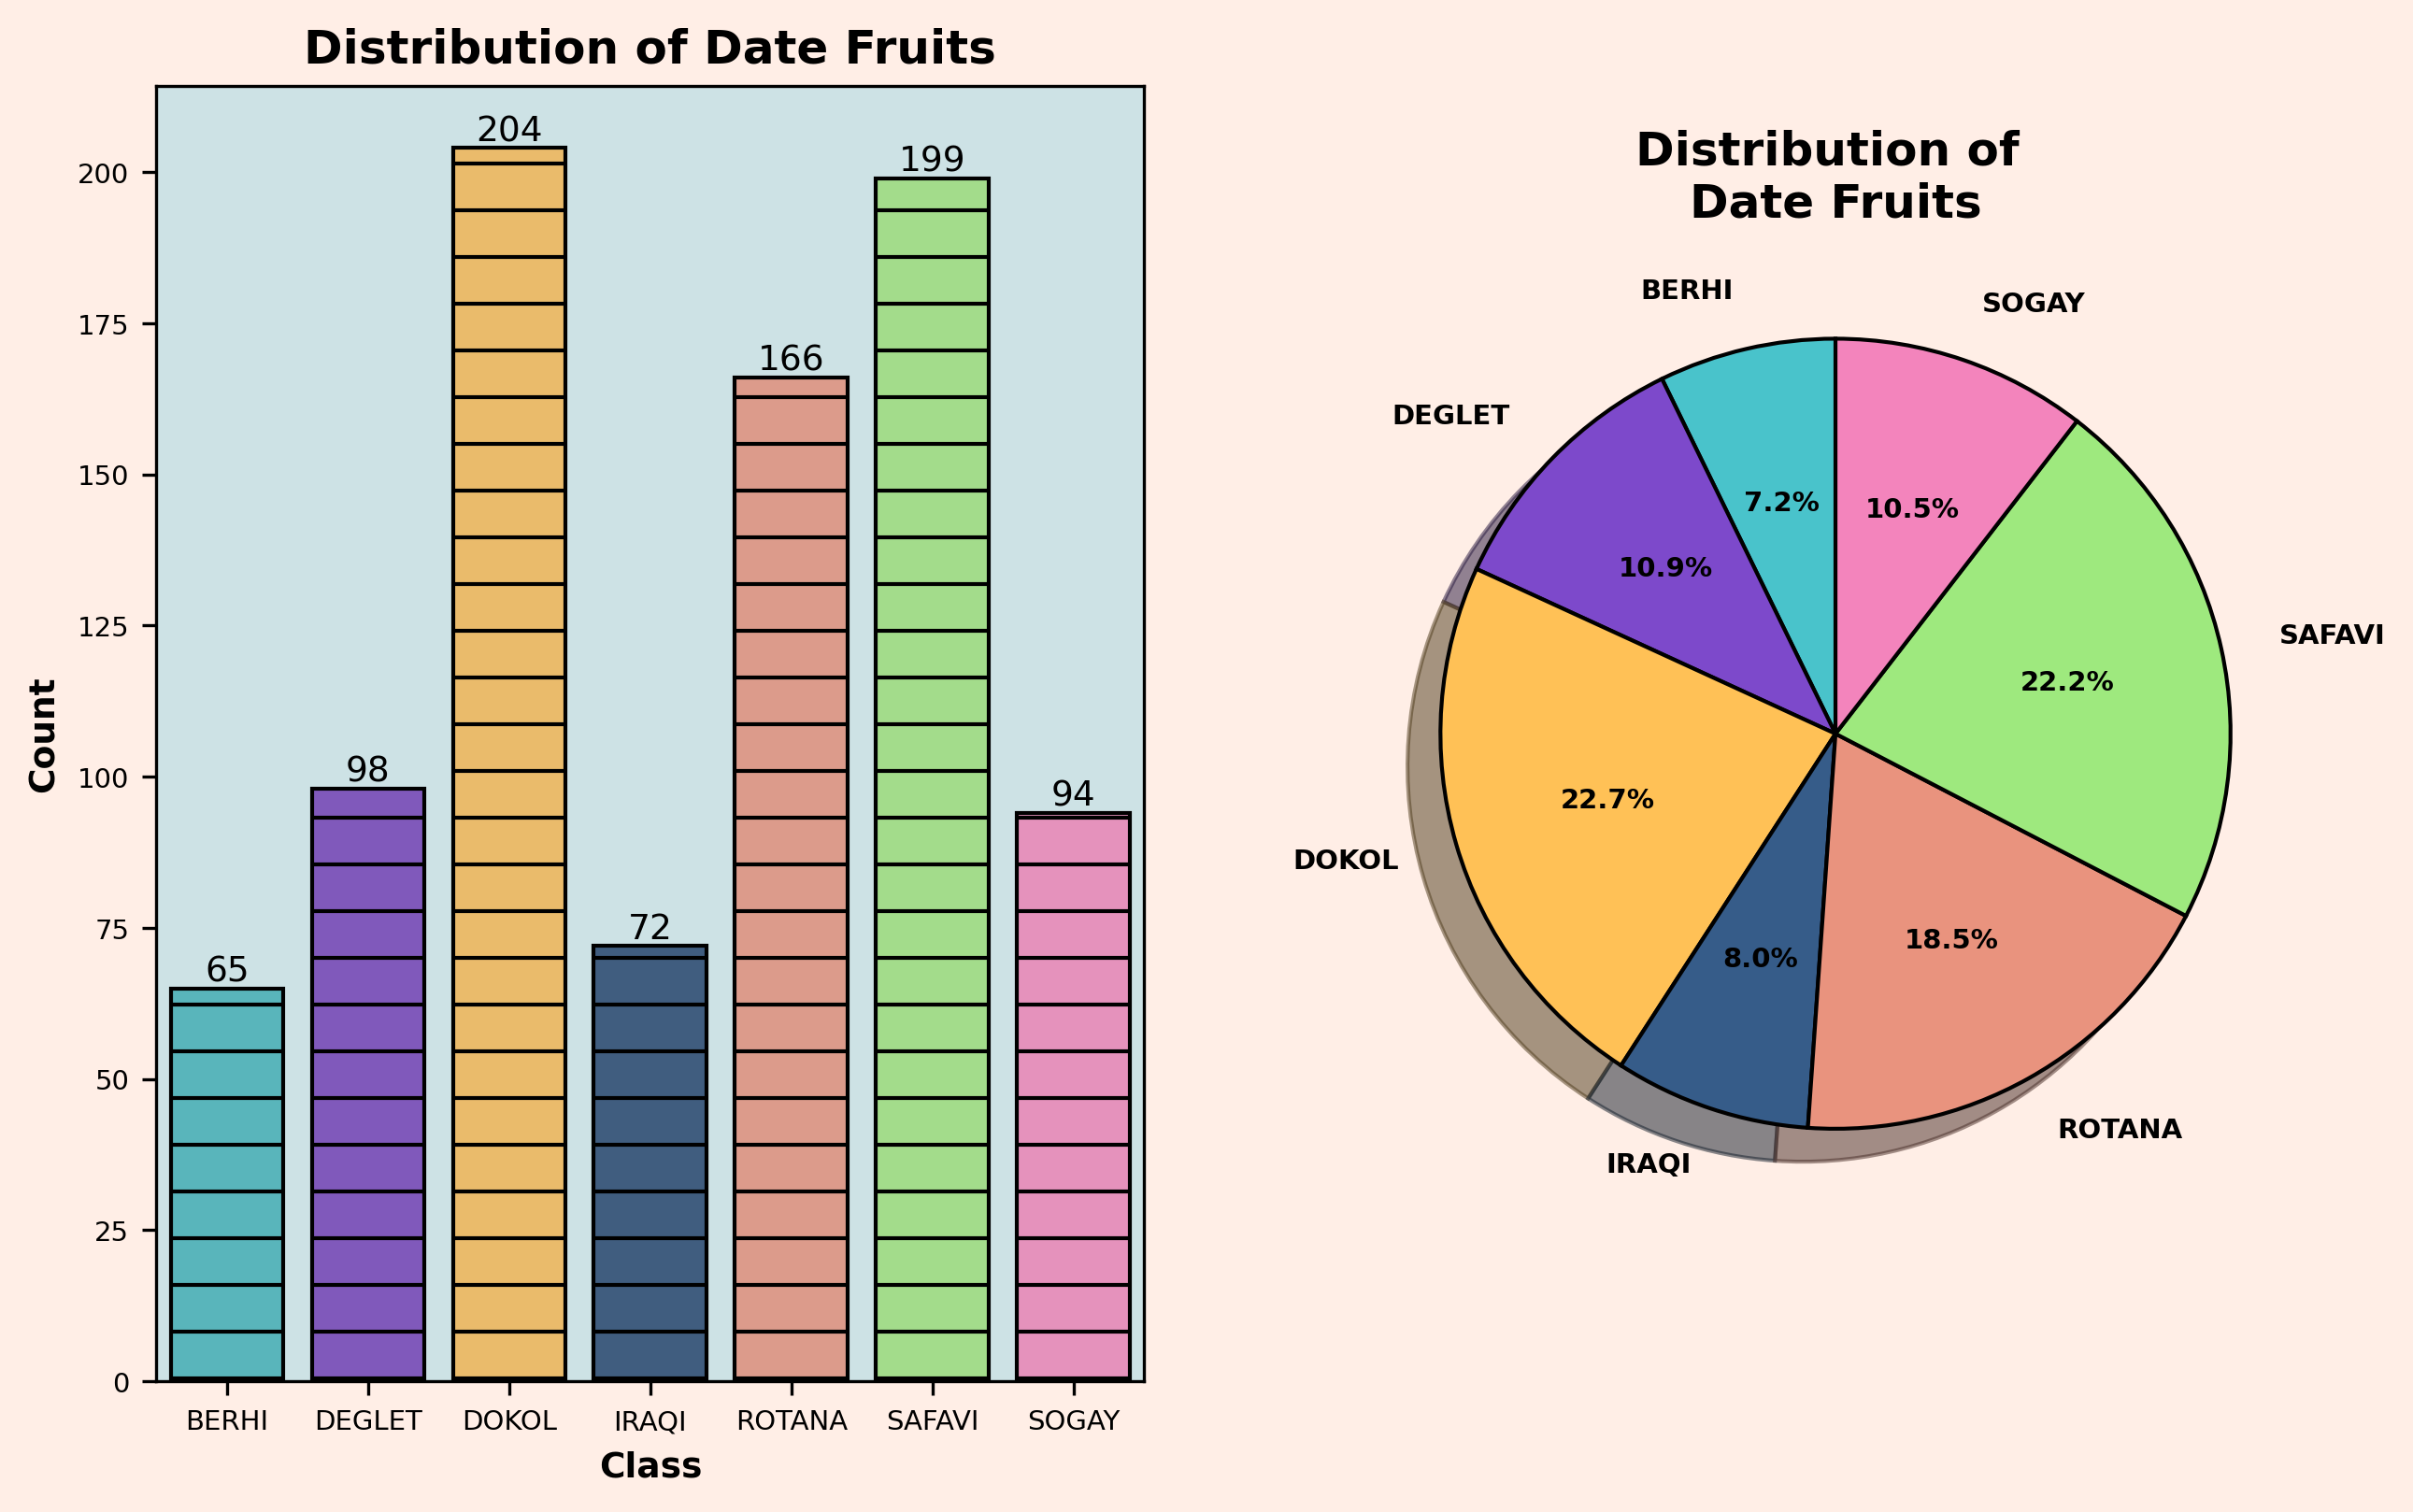

In [ ]:
# Calculate the number of samples for each class and convert it into a dictionary
type_dict = df["Class"].value_counts().to_dict()
# Sort the dictionary by keys (class labels)
type_dict = OrderedDict(sorted(type_dict.items()))
# Get class labels and corresponding sample counts
type_label = type_dict.keys()
type_value = type_dict.values()
# Set the explosion degree for the pie chart (explode), all set to 0 here, indicating no separation
explode = (0,)*df["Class"].nunique()

# Create a figure with two subplots, setting the background color to '#ffeee6'
fig, ax = plt.subplots(1,2, facecolor='#ffeee6')

# Draw a bar plot to show the distribution of samples for each class
sns.countplot(data=df, x="Class", palette=colors, edgecolor="black", hatch="-", ax=ax[0])
ax[0].set_title("Distribution of Date Fruits", size=12, fontweight="bold")
ax[0].set_xlabel("Class", size=9, fontweight="bold")
ax[0].set_ylabel("Count", size=9, fontweight="bold")
ax[0].tick_params(axis="x", labelsize=7)
ax[0].tick_params(axis="y", labelsize=7)
ax[0].bar_label(ax[0].containers[0], fmt='%.0f', color="black", fontsize=9)

# Draw a pie chart to show the percentage of samples for each class
plt.pie(type_value, explode=explode, labels=type_label, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 7, "fontweight" : "bold", "color":"black"},  wedgeprops=
       {'edgecolor':'black'} ,colors=colors, labeldistance=1.15)
plt.title("Distribution of \nDate Fruits", size=12, fontweight="bold")

# Data Preprocessing

In [ ]:
# Extract features and target variable from the dataset
X = df.drop("Class", axis = 1)
y = df["Class"]

# Create backup copies of features and the target variable for the neural network
X_nn = X
y_nn = y

# Use LabelEncoder to encode the target variable
le = LabelEncoder() # encoding
y = le.fit_transform(y)

# Split the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,

                                                    stratify=y, random_state=42) # splitting

# The purpose of this code is to perform data preprocessing tasks,
# including feature extraction, creating backups, encoding the target variable, and splitting the dataset into training and testing sets.
# These steps lay the foundation for subsequent training of a neural network.

# Standardized the data

In [ ]:
# Create a StandardScaler object for feature scaling
scaler = StandardScaler() # scaling

# Scale the features of the training set
X_train_scaled = scaler.fit_transform(X_train)

# Scale the features of the testing set
X_test_scaled = scaler.transform(X_test)

# Convert the scaled training set back to DataFrame format
X_train = pd.DataFrame(X_train_scaled)

# Convert the scaled testing set back to DataFrame format
X_test = pd.DataFrame(X_test_scaled)

# In summary, this code applies feature scaling to standardize the features
# in both the training and testing sets, ensuring that they have comparable scales.
# Feature scaling is a common preprocessing step in machine learning to enhance the performance and convergence of certain algorithms.


In [ ]:
print(f""" Dataset shape
  X_train shape: {X_train.shape}
  X_test shape: {X_test.shape}
  y_train shape: {y_train.shape}
  y_test shape: {y_test.shape}
""")
# Shape information of the 'feature matrices' of the training set and test set is provided.
# The training set of 628 rows represents 628 samples, each with 34 features.
# The test set of 270 rows represents 270 samples, each of which also has 34 features.
# This is crucial for machine learning models to understand the dimensions and number of features of the input data.

# Shape information of the 'target variable' for the training set and test set is provided.
# 628 training set labels represent target labels with 628 training samples.
# 270 test set labels means there are target labels for 270 test samples.
# This is very important for supervised learning models to understand the dimensions and number of categories of the target variable.

# With this information, machine learning practitioners can ensure that the dimensions and structure of the data
# match the input expected by the model, avoiding errors caused by inconsistent data shapes.

# Additionally, it serves as the basis for further data exploration and feature engineering,
# helping to select appropriate models and evaluate model performance.

 Dataset shape
  X_train shape: (628, 34)
  X_test shape: (270, 34)
  y_train shape: (628,)
  y_test shape: (270,)



# Model Building

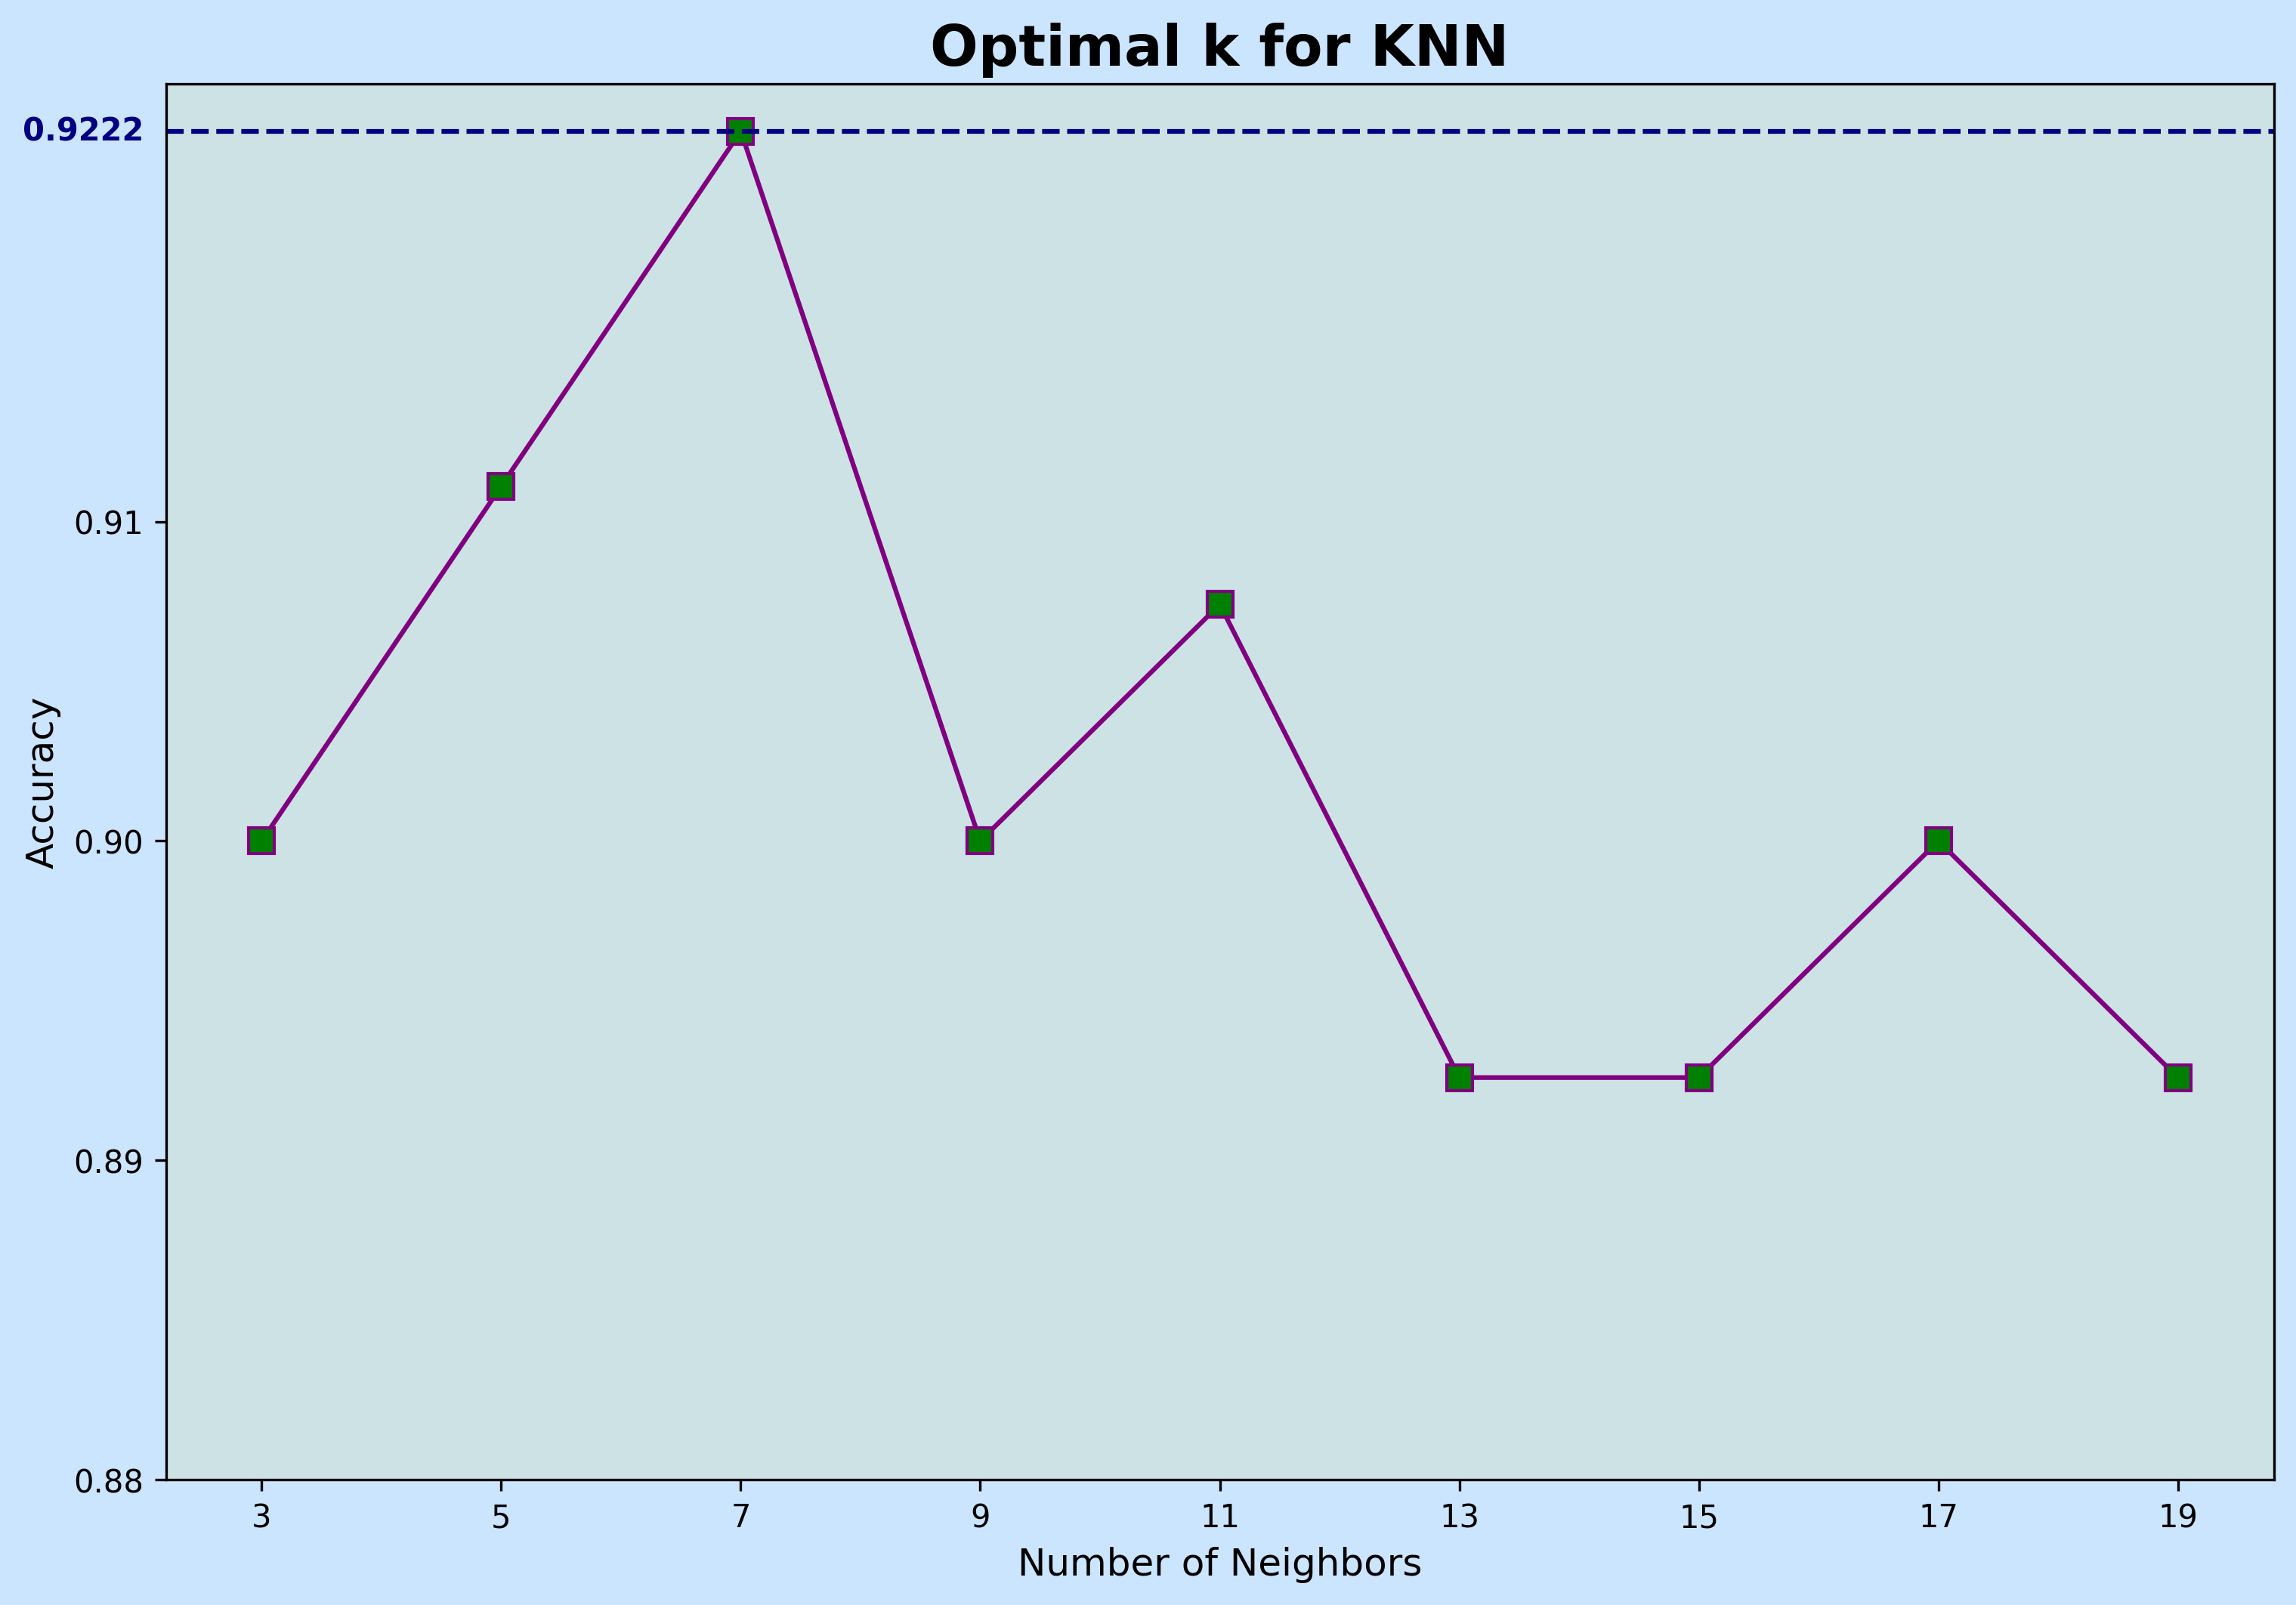

In [ ]:
custom_neighbors = list(range(3, 20, 2))
custom_scores = []

for num in custom_neighbors:
    custom_knn = KNeighborsClassifier(n_neighbors=num)
    custom_knn.fit(X_train, y_train)
    y_predict_custom_knn = custom_knn.predict(X_test)
    custom_scores.append(accuracy_score(y_test, y_predict_custom_knn))

fig, ax = plt.subplots(1, 1, figsize=(12, 8), facecolor="#CCE5FF")
plt.plot(custom_neighbors, custom_scores, marker="s", markerfacecolor="green", markersize=8, color="purple")
plt.xticks(np.arange(3, 20, 2))
plt.yticks(np.arange(0.880, 0.915, 0.010))
plt.xlabel("Number of Neighbors", size=12)
plt.ylabel("Accuracy", size=12)
ax.axhline(y=max(custom_scores), linewidth=1.5, color="navy", linestyle="dashed")
trans = transforms.blended_transform_factory(
    ax.get_yticklabels()[0].get_transform(), ax.transData)
ax.text(0, max(custom_scores), "{:.4f}".format(max(custom_scores)), color="navy", transform=trans,
        ha="right", va="center", fontweight="bold")
plt.title("Optimal k for KNN", size=18, fontweight="bold")
plt.show()

In [ ]:
class CustomModels:

    def __init__(self, custom_X_train, custom_X_test, custom_y_train, custom_y_test):

        self.custom_score_dict = {}

        self.custom_X_train = custom_X_train
        self.custom_X_test = custom_X_test
        self.custom_y_train = custom_y_train
        self.custom_y_test = custom_y_test

        # Logistic Regression
        self.custom_lr = LogisticRegression(C=0.1)
        self.custom_lr.fit(self.custom_X_train, self.custom_y_train)
        self.custom_y_predict_lr = self.custom_lr.predict(self.custom_X_test)

        # Decision Tree Classifier
        self.custom_dtc = DecisionTreeClassifier(criterion='gini', min_samples_split=10, random_state=42)
        self.custom_dtc.fit(self.custom_X_train, self.custom_y_train)
        self.custom_y_predict_dtc = self.custom_dtc.predict(self.custom_X_test)

        # Random Forest Classifier
        self.custom_rfc = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=10)
        self.custom_rfc.fit(self.custom_X_train, self.custom_y_train)
        self.custom_y_predict_rfc = self.custom_rfc.predict(self.custom_X_test)

        # K-Nearest Neighbors
        self.custom_knn = KNeighborsClassifier(n_neighbors=7)
        self.custom_knn.fit(self.custom_X_train, self.custom_y_train)
        self.custom_y_predict_knn = self.custom_knn.predict(self.custom_X_test)

        # Naive Bayes
        self.custom_nb = GaussianNB()
        self.custom_nb.fit(self.custom_X_train, self.custom_y_train)
        self.custom_y_predict_nb = self.custom_nb.predict(self.custom_X_test)

    def accuracy_scores(self):

        self.custom_score_dict["LR"] = round(self.custom_lr.score(self.custom_X_test, self.custom_y_test), 3)
        self.custom_score_dict["DTC"] = round(self.custom_dtc.score(self.custom_X_test, self.custom_y_test), 3)
        self.custom_score_dict["RFC"] = round(self.custom_rfc.score(self.custom_X_test, self.custom_y_test), 3)
        self.custom_score_dict["KNN"] = round(self.custom_knn.score(self.custom_X_test, self.custom_y_test), 3)
        self.custom_score_dict["NB"] = round(self.custom_nb.score(self.custom_X_test, self.custom_y_test), 3)

        fig, ax = plt.subplots(2, 1, figsize=(12, 10), dpi=300, facecolor="#FFD8B1")
        acc_scores = [list(self.custom_score_dict.values())]
        collabel = tuple(self.custom_score_dict.keys())
        index_max = list(self.custom_score_dict.values()).index(max(list(self.custom_score_dict.values())))
        ax[0].axis('tight')
        ax[0].axis('off')
        the_table = ax[0].table(cellText=acc_scores, colLabels=collabel, loc='center', cellLoc="center")
        ax[0].set_title("Accuracy Comparison Table", y=0.6, color="blue", fontweight="bold")

        for i in range(0, len(list(self.custom_score_dict.keys()))):
            the_table[(0, i)].set_facecolor("#FFABAB")

        the_table[(1, index_max)].set_facecolor("#98DE6F")
        ax[1].plot(list(self.custom_score_dict.keys()), list(self.custom_score_dict.values()), color="blue",
                   marker="o")
        plt.title("Comparison of Models According to Accuracy Scores", color="blue", fontweight="bold")
        plt.xlabel("Model", color="blue")
        plt.ylabel("Accuracy Score", color="blue")
        plt.show()

    def confusion_matrices(self):

        model_list = [self.custom_lr, self.custom_dtc, self.custom_rfc, self.custom_knn, self.custom_nb]
        model_names = ["LR", "DTC", "RFC", "KNN", "NB"]

        for i in range(len(model_list)):
            cm = confusion_matrix(self.custom_y_test, model_list[i].predict(self.custom_X_test))
            cm_df = pd.DataFrame(cm, index=le.classes_, columns=le.classes_)
            plt.figure(figsize=(10, 6), dpi=300, facecolor="#FFD8B1")
            sns.heatmap(cm_df, annot=True, cmap="Oranges", fmt=".1f")
            plt.title(f"{model_names[i]} Confusion Matrix")
            plt.xlabel("Predicted")
            plt.ylabel("True")

    def classification_reports(self):

        red_start = '\033[91m'
        red_end = '\033[90m'
        blue_start = '\033[94m'
        blue_end = '\033[90m'
        bold_start = "\033[1m"
        bold_end = "\033[0;0m"

        model_list = [self.custom_lr, self.custom_dtc, self.custom_rfc, self.custom_knn, self.custom_nb]
        model_names = ["LR", "DTC", "RFC", "KNN", "NB"]

        for i in range(len(model_list)):
            print(red_start + bold_start + f"{model_names[i]}\n" + bold_end + red_end)
            print(blue_start + classification_report(self.custom_y_test, model_list[i].predict(self.custom_X_test),
                                                     target_names=le.classes_) + bold_end)
            print(red_start + bold_start + "*" * 53 + "\n" + bold_end + red_end)

    def cross_validations(self):

        cv_dict = {}
        cv = 10
        model_list = [self.custom_lr, self.custom_dtc, self.custom_rfc, self.custom_knn, self.custom_nb]
        model_names = ["LR", "DTC", "RFC", "KNN", "NB"]

        for i in range(len(model_list)):
            cv_dict[model_names[i]] = round(
                cross_val_score(estimator=model_list[i], X=self.custom_X_train, y=self.custom_y_train, cv=cv).mean(),
                3)

        fig, ax = plt.subplots(2, 1, figsize=(12, 10), dpi=300, facecolor="#FFD8B1")
        acc_scores = [list(cv_dict.values())]
        collabel = tuple(cv_dict.keys())
        index_max = list(cv_dict.values()).index(max(list(cv_dict.values())))
        ax[0].axis('tight')
        ax[0].axis('off')
        the_table = ax[0].table(cellText=acc_scores, colLabels=collabel, loc='center', cellLoc="center")
        ax[0].set_title("CV Comparison Table", y=0.6, color="blue", fontweight="bold")

        for i in range(0, len(list(cv_dict.keys()))):
            the_table[(0, i)].set_facecolor("#FFABAB")

        color_list = ['lightgreen' if (x == max(list(cv_dict.values()))) else '#974576' for x in
                      list(cv_dict.values())]
        hatchs = ['O' if (x == max(list(cv_dict.values()))) else None for x in list(cv_dict.values())]

        the_table[(1, index_max)].set_facecolor("#98DE6F")
        ax[1].bar(list(cv_dict.keys()), list(cv_dict.values()), color=color_list, hatch=hatchs, edgecolor="black", lw=2)
        ax[1].set_ylim([0.75, 0.95])
        ax[1].bar_label(ax[1].containers[0], fmt='%.3f', color="black", fontsize=12, fontweight="bold")
        plt.title("Comparison of Models According to CV Scores", color="blue", fontweight="bold")
        plt.xlabel("Model", color="blue")
        plt.ylabel("CV Score", color="blue")
        plt.show()

In [ ]:
models = CustomModels(X_train, X_test, y_train, y_test)

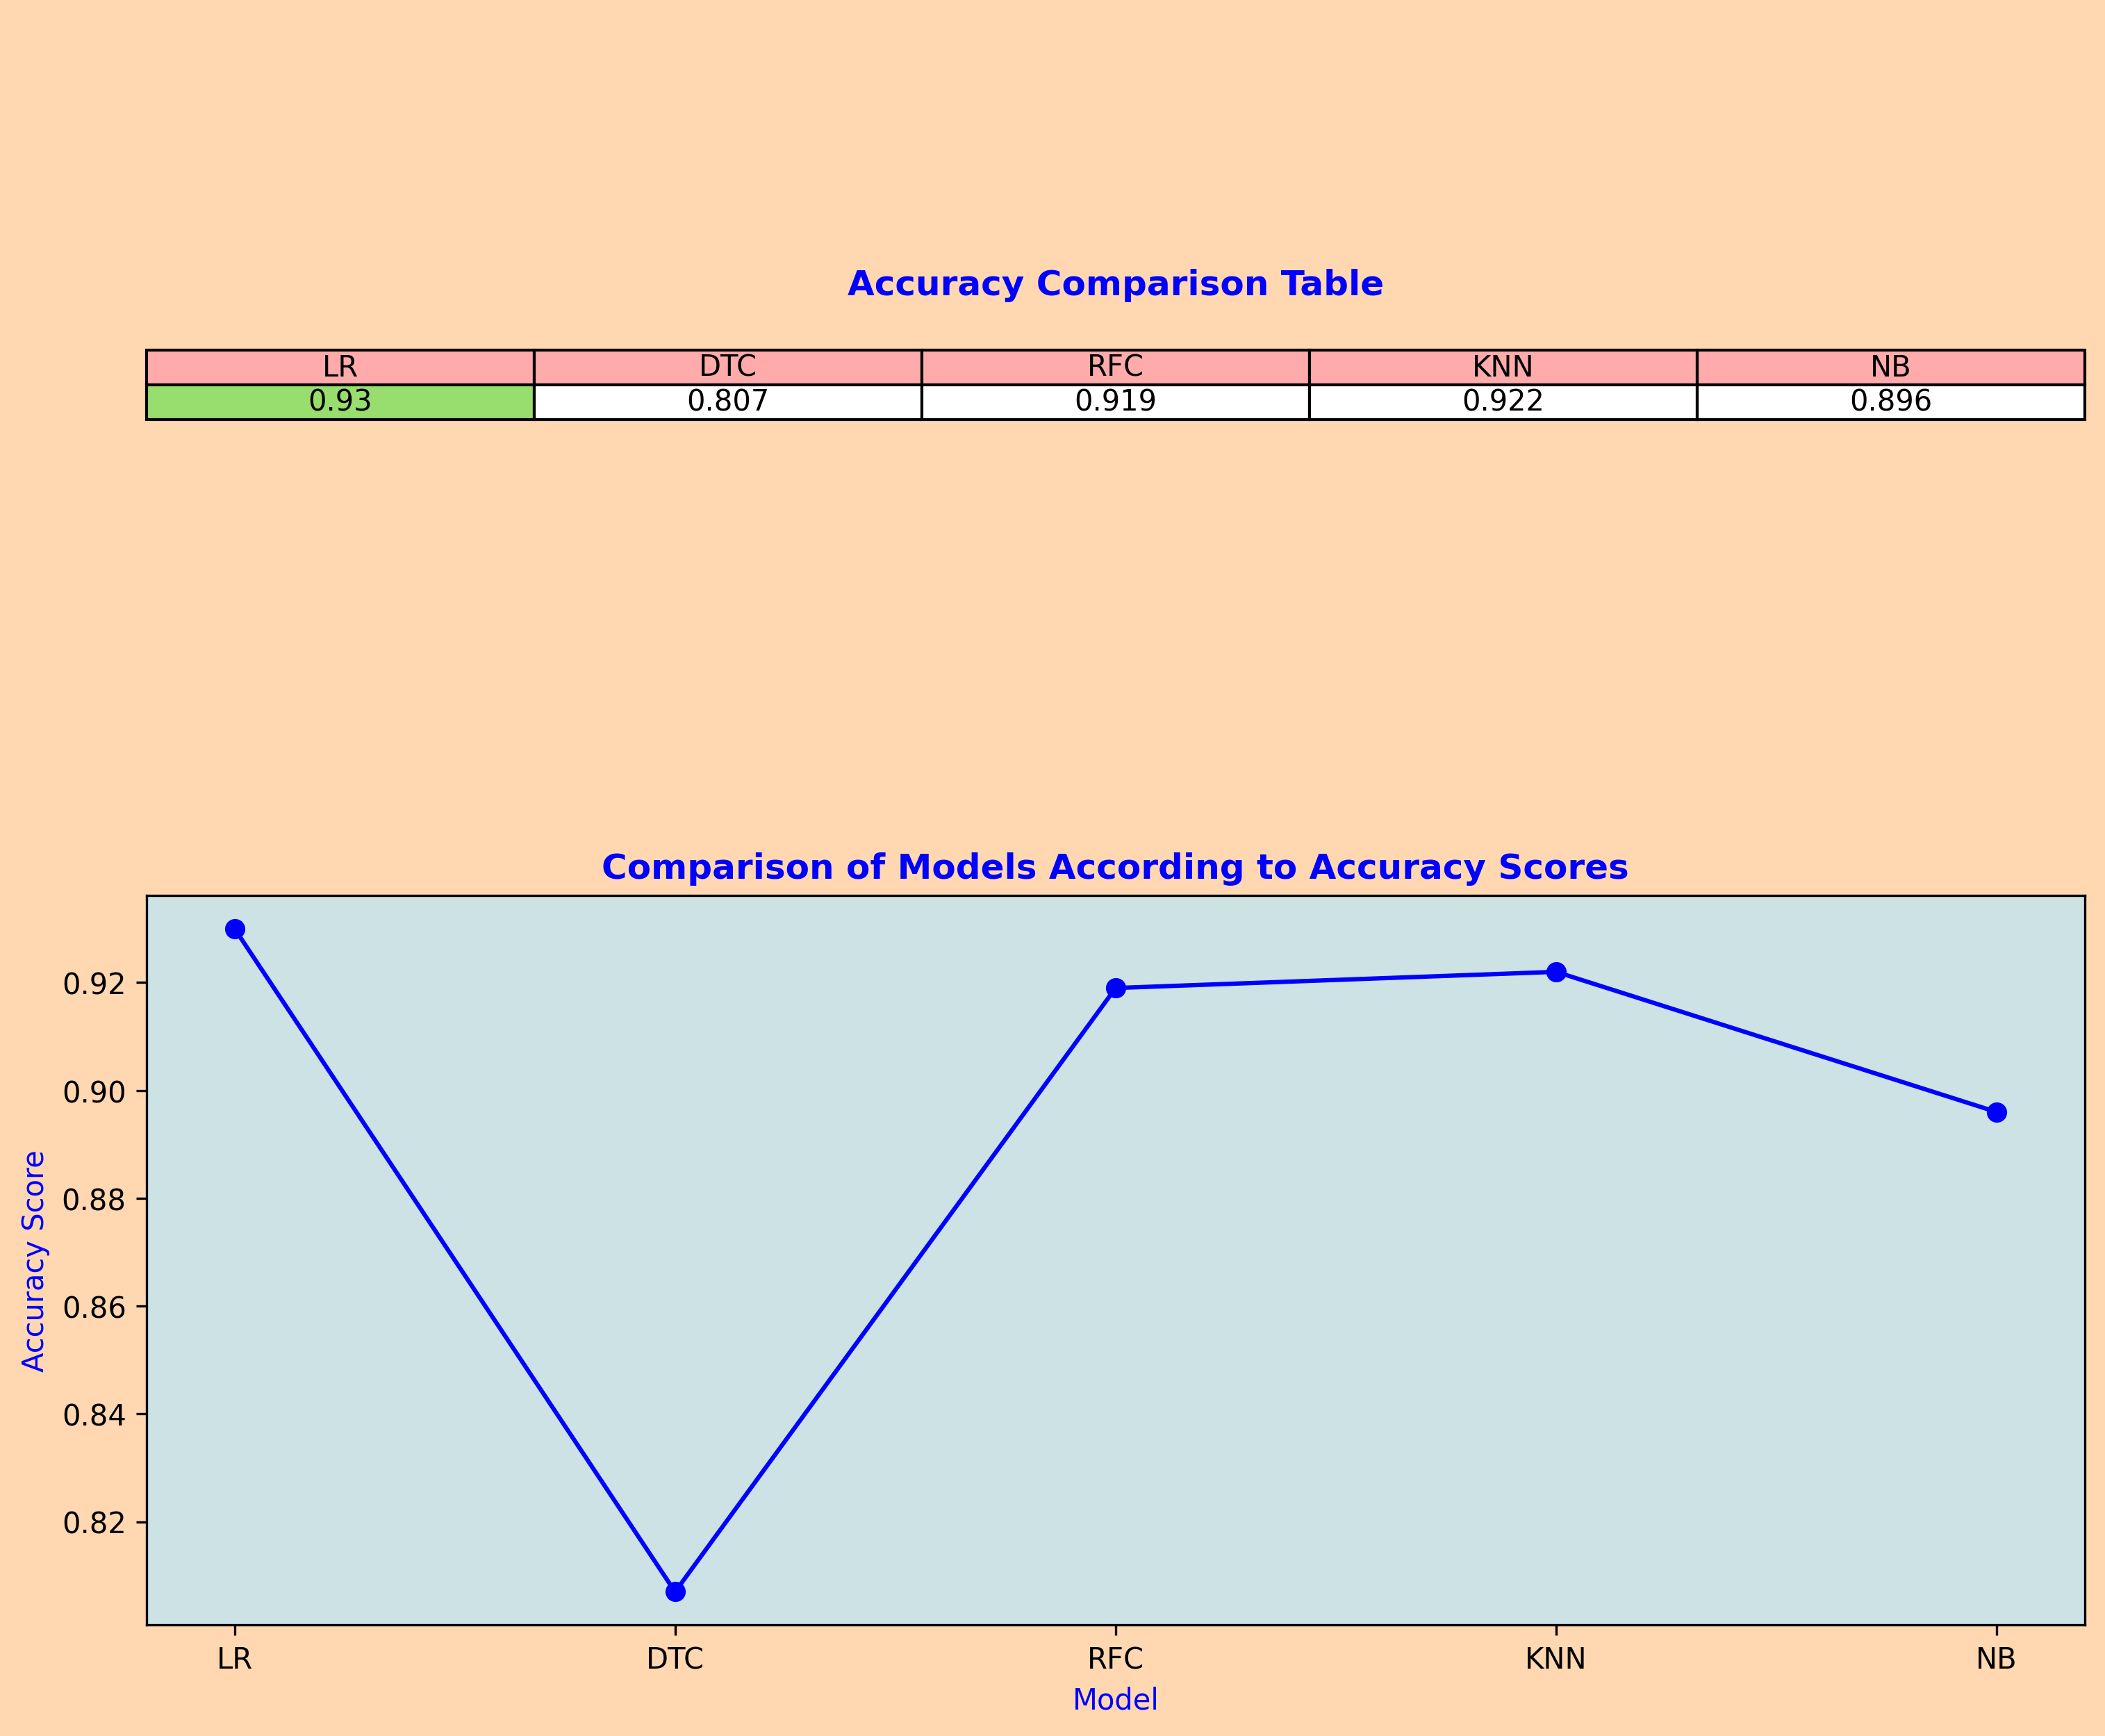

In [ ]:
models.accuracy_scores()

In [ ]:
models.classification_reports()

LR

              precision    recall  f1-score   support

       BERHI       1.00      0.90      0.95        20
      DEGLET       0.82      0.79      0.81        29
       DOKOL       0.94      0.98      0.96        61
       IRAQI       0.92      1.00      0.96        22
      ROTANA       0.92      0.96      0.94        50
      SAFAVI       0.97      0.98      0.98        60
       SOGAY       0.91      0.75      0.82        28

    accuracy                           0.93       270
   macro avg       0.93      0.91      0.92       270
weighted avg       0.93      0.93      0.93       270

*****************************************************

DTC

              precision    recall  f1-score   support

       BERHI       0.81      0.65      0.72        20
      DEGLET       0.53      0.66      0.58        29
       DOKOL       0.92      0.89      0.90        61
       IRAQI       0.59      0.73      0.65        22
      ROTANA       0.93      0.84      0.88        50
      SAFAVI  

# NeuralNetwork

In [ ]:
import tensorflow as tf
X = pd.DataFrame(minmax_scale(X_nn))
le = LabelEncoder() # encoding
y = le.fit_transform(y)
# TODO test_size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                    stratify=y, random_state=42) # splitting

In [ ]:
scaler = StandardScaler() # scaling
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train = pd.DataFrame(X_train_scaled)
X_test = pd.DataFrame(X_test_scaled)


# SGD_Batch_128

In [ ]:
# Training the model with specified batch size
batch_size = 128
# Initialize the model
nn_model_SGD = tf.keras.Sequential()

# # Input Layers
input_layer = tf.keras.layers.Dense(4096, input_shape=(34,), activation ="relu")
nn_model_SGD.add(input_layer)
# Hidden Layers
for i in range(3):
    nn_model_SGD.add(tf.keras.layers.Dense(4096, activation = "relu"))
    nn_model_SGD.add(tf.keras.layers.Dropout(0.5)) # avoid overfitting problem - forget 20% of its input data(randomly)
# Output Layers
nn_model_SGD.add(tf.keras.layers.Dense(7, activation = "softmax"))

# Optimizer and Compilation (Using SGD optimizer)
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)  # Set the learning rate accordingly
nn_model_SGD.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Assuming X_train, y_train, val_data, val_labels represent your datasets
resultSGD = nn_model_SGD.fit(X_train, y_train, batch_size=batch_size, epochs=100, validation_data=(X_train, y_train))


Epoch 1/100
5/5 [==============================] - 1s 111ms/step - loss: 1.9285 - accuracy: 0.2341 - val_loss: 1.8810 - val_accuracy: 0.4793
Epoch 2/100
5/5 [==============================] - 0s 49ms/step - loss: 1.8621 - accuracy: 0.3551 - val_loss: 1.8221 - val_accuracy: 0.5525
Epoch 3/100
5/5 [==============================] - 0s 40ms/step - loss: 1.8152 - accuracy: 0.4347 - val_loss: 1.7652 - val_accuracy: 0.5924
Epoch 4/100
5/5 [==============================] - 0s 36ms/step - loss: 1.7637 - accuracy: 0.4729 - val_loss: 1.7097 - val_accuracy: 0.6083
Epoch 5/100
5/5 [==============================] - 0s 42ms/step - loss: 1.7161 - accuracy: 0.4841 - val_loss: 1.6551 - val_accuracy: 0.6178
Epoch 6/100
5/5 [==============================] - 0s 33ms/step - loss: 1.6735 - accuracy: 0.5000 - val_loss: 1.6012 - val_accuracy: 0.6194
Epoch 7/100
5/5 [==============================] - 0s 39ms/step - loss: 1.6115 - accuracy: 0.5350 - val_loss: 1.5480 - val_accuracy: 0.6194
Epoch 8/100
5/5 [==

In [ ]:
# Evaluate the model
loss, accuracy = nn_model_SGD.evaluate(X_test, y_test, batch_size=batch_size)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

3/3 [==============================] - 0s 9ms/step - loss: 0.3823 - accuracy: 0.8519
Test loss: 0.3823
Test accuracy: 0.8519


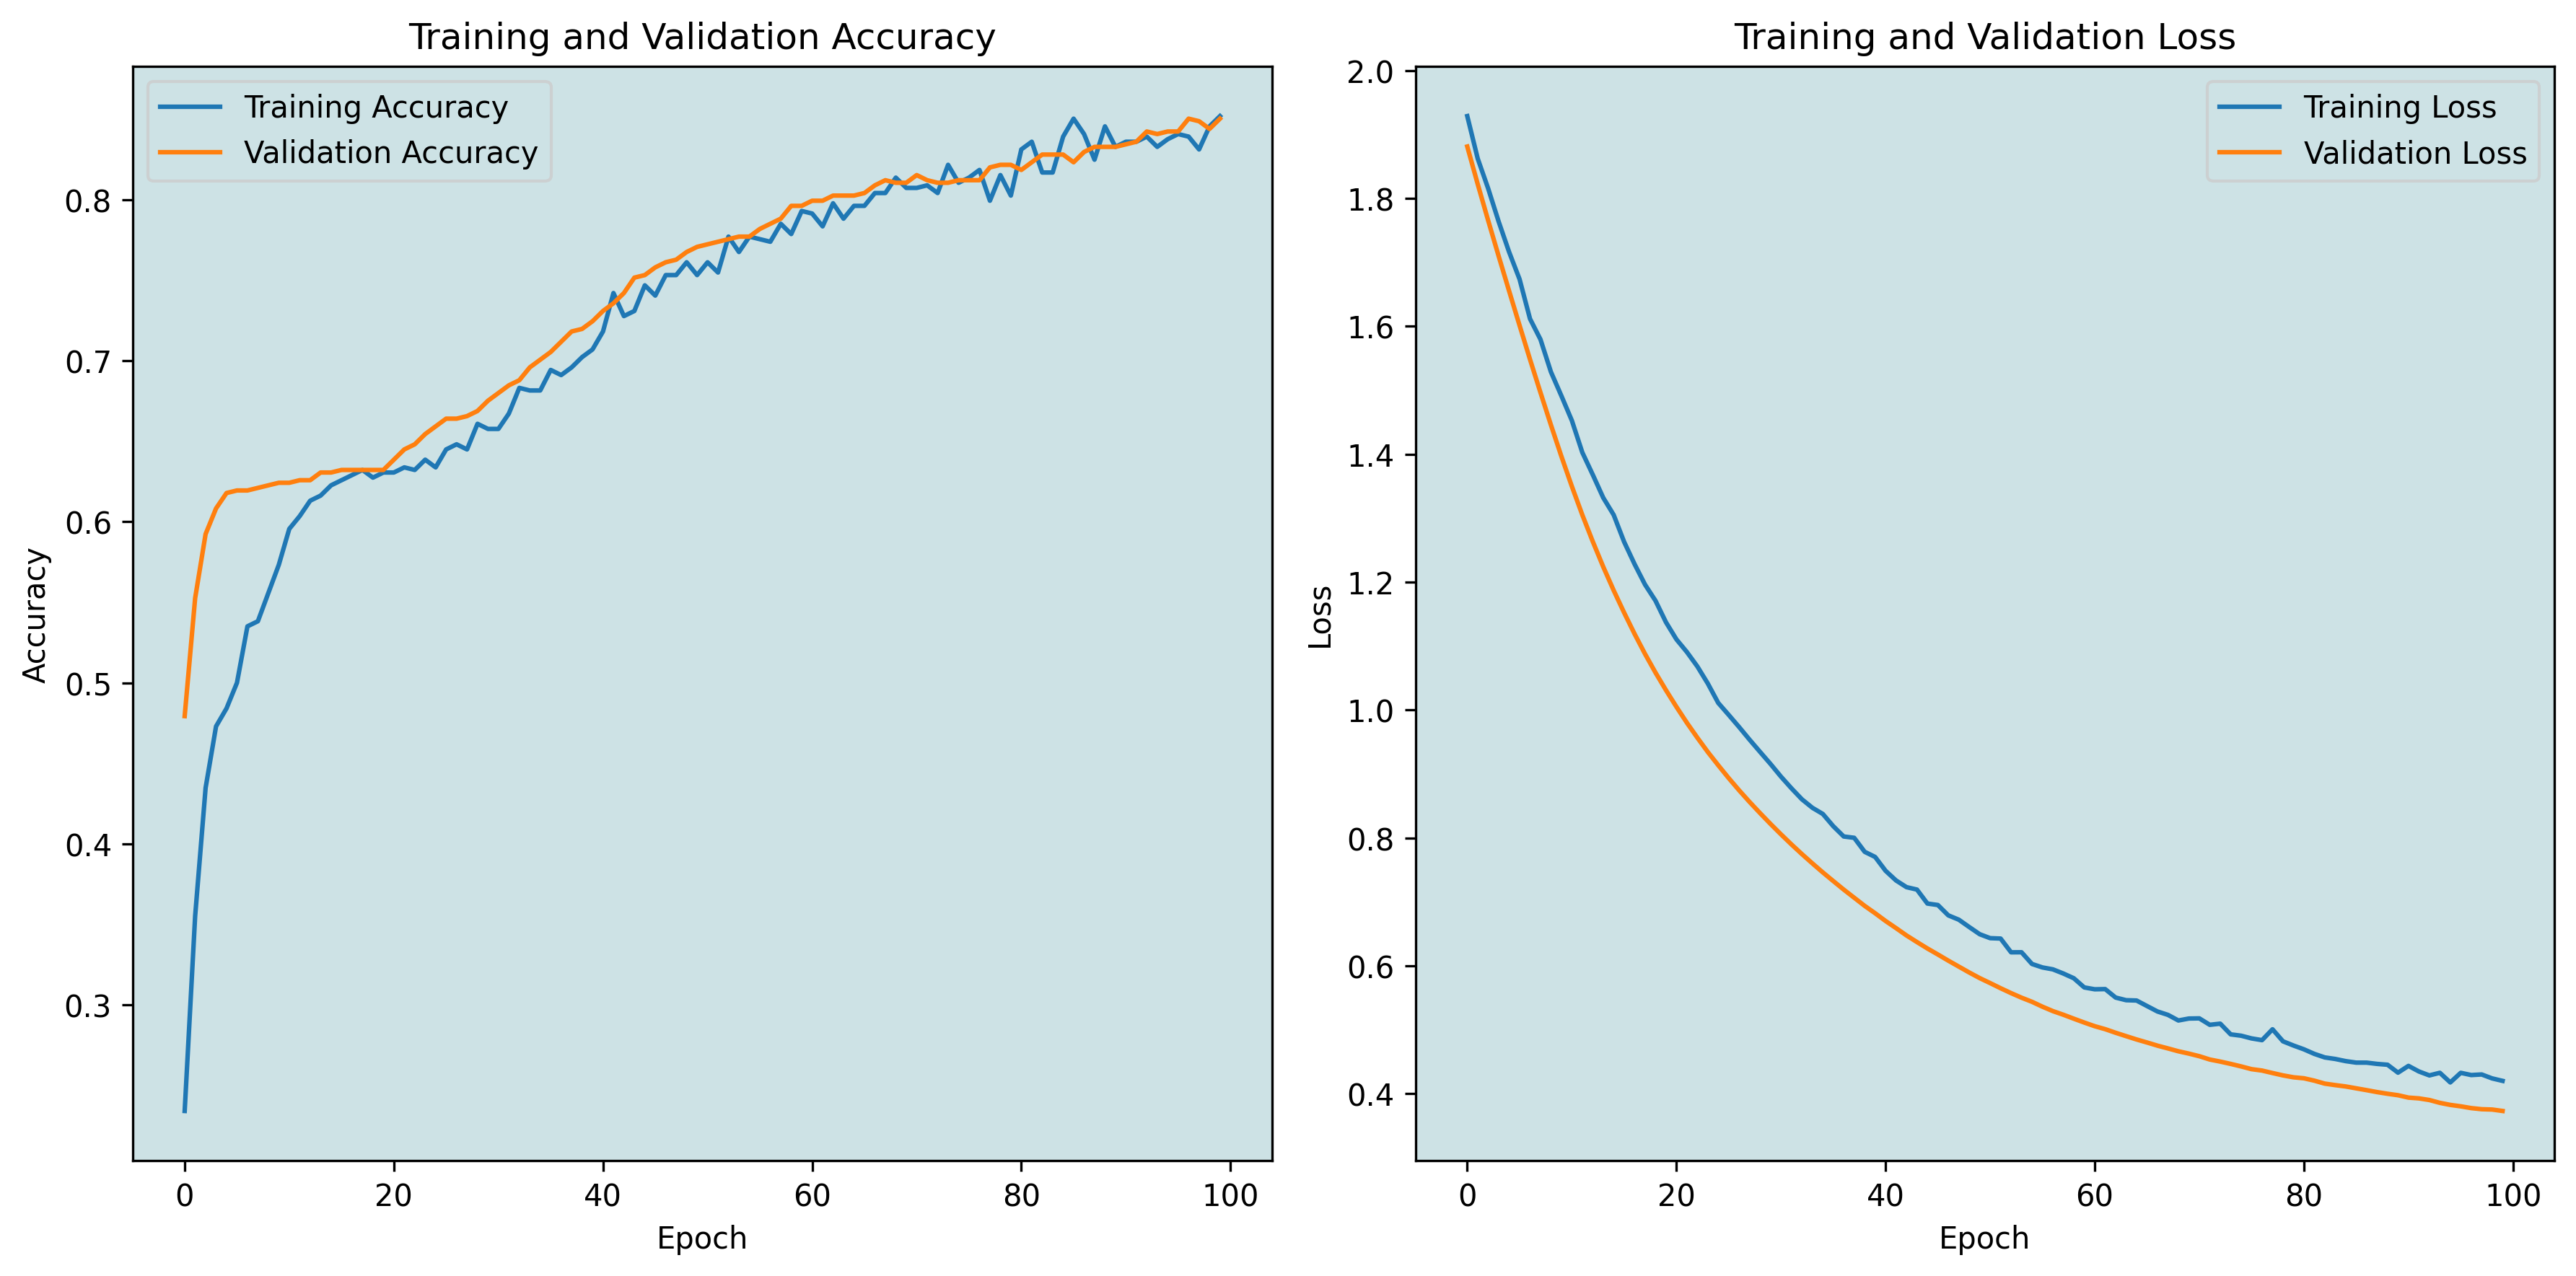

In [ ]:
# Plot accuracy and loss
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(resultSGD.history['accuracy'], label='Training Accuracy')
plt.plot(resultSGD.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(resultSGD.history['loss'], label='Training Loss')
plt.plot(resultSGD.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
nn_model_SGD.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 4096)              143360    
                                                                 
 dense_46 (Dense)            (None, 4096)              16781312  
                                                                 
 dropout_27 (Dropout)        (None, 4096)              0         
                                                                 
 dense_47 (Dense)            (None, 4096)              16781312  
                                                                 
 dropout_28 (Dropout)        (None, 4096)              0         
                                                                 
 dense_48 (Dense)            (None, 4096)              16781312  
                                                                 
 dropout_29 (Dropout)        (None, 4096)             

# SGD_Batch_64

In [ ]:
# Initialize the model
nn_model_SGD = tf.keras.Sequential()

# # Input Layers
input_layer = tf.keras.layers.Dense(4096, input_shape=(34,), activation ="relu")
nn_model_SGD.add(input_layer)
# Hidden Layers
for i in range(3):
    nn_model_SGD.add(tf.keras.layers.Dense(4096, activation = "relu"))
    nn_model_SGD.add(tf.keras.layers.Dropout(0.5)) # avoid overfitting problem - forget 20% of its input data(randomly)
# Output Layers
nn_model_SGD.add(tf.keras.layers.Dense(7, activation = "softmax"))

# Optimizer and Compilation (Using SGD optimizer)
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)  # Set the learning rate accordingly
nn_model_SGD.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Training the model with specified batch size
batch_size = 64
# Assuming X_train, y_train, val_data, val_labels represent your datasets
resultSGD = nn_model_SGD.fit(X_train, y_train, batch_size=batch_size, epochs=100, validation_data=(X_train, y_train))


Epoch 1/100
10/10 [==============================] - 1s 48ms/step - loss: 1.8834 - accuracy: 0.2420 - val_loss: 1.7977 - val_accuracy: 0.4220
Epoch 2/100
10/10 [==============================] - 0s 21ms/step - loss: 1.7654 - accuracy: 0.3726 - val_loss: 1.6878 - val_accuracy: 0.5589
Epoch 3/100
10/10 [==============================] - 0s 20ms/step - loss: 1.6776 - accuracy: 0.4379 - val_loss: 1.5809 - val_accuracy: 0.6099
Epoch 4/100
10/10 [==============================] - 0s 19ms/step - loss: 1.5952 - accuracy: 0.4984 - val_loss: 1.4809 - val_accuracy: 0.6226
Epoch 5/100
10/10 [==============================] - 0s 19ms/step - loss: 1.5038 - accuracy: 0.5637 - val_loss: 1.3859 - val_accuracy: 0.6242
Epoch 6/100
10/10 [==============================] - 0s 19ms/step - loss: 1.4252 - accuracy: 0.6035 - val_loss: 1.2996 - val_accuracy: 0.6242
Epoch 7/100
10/10 [==============================] - 0s 22ms/step - loss: 1.3512 - accuracy: 0.6178 - val_loss: 1.2213 - val_accuracy: 0.6290
Epoch 

In [ ]:
# Evaluate the model
loss, accuracy = nn_model_SGD.evaluate(X_test, y_test, batch_size=batch_size)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

5/5 [==============================] - 0s 7ms/step - loss: 0.2583 - accuracy: 0.9185
Test loss: 0.2583
Test accuracy: 0.9185


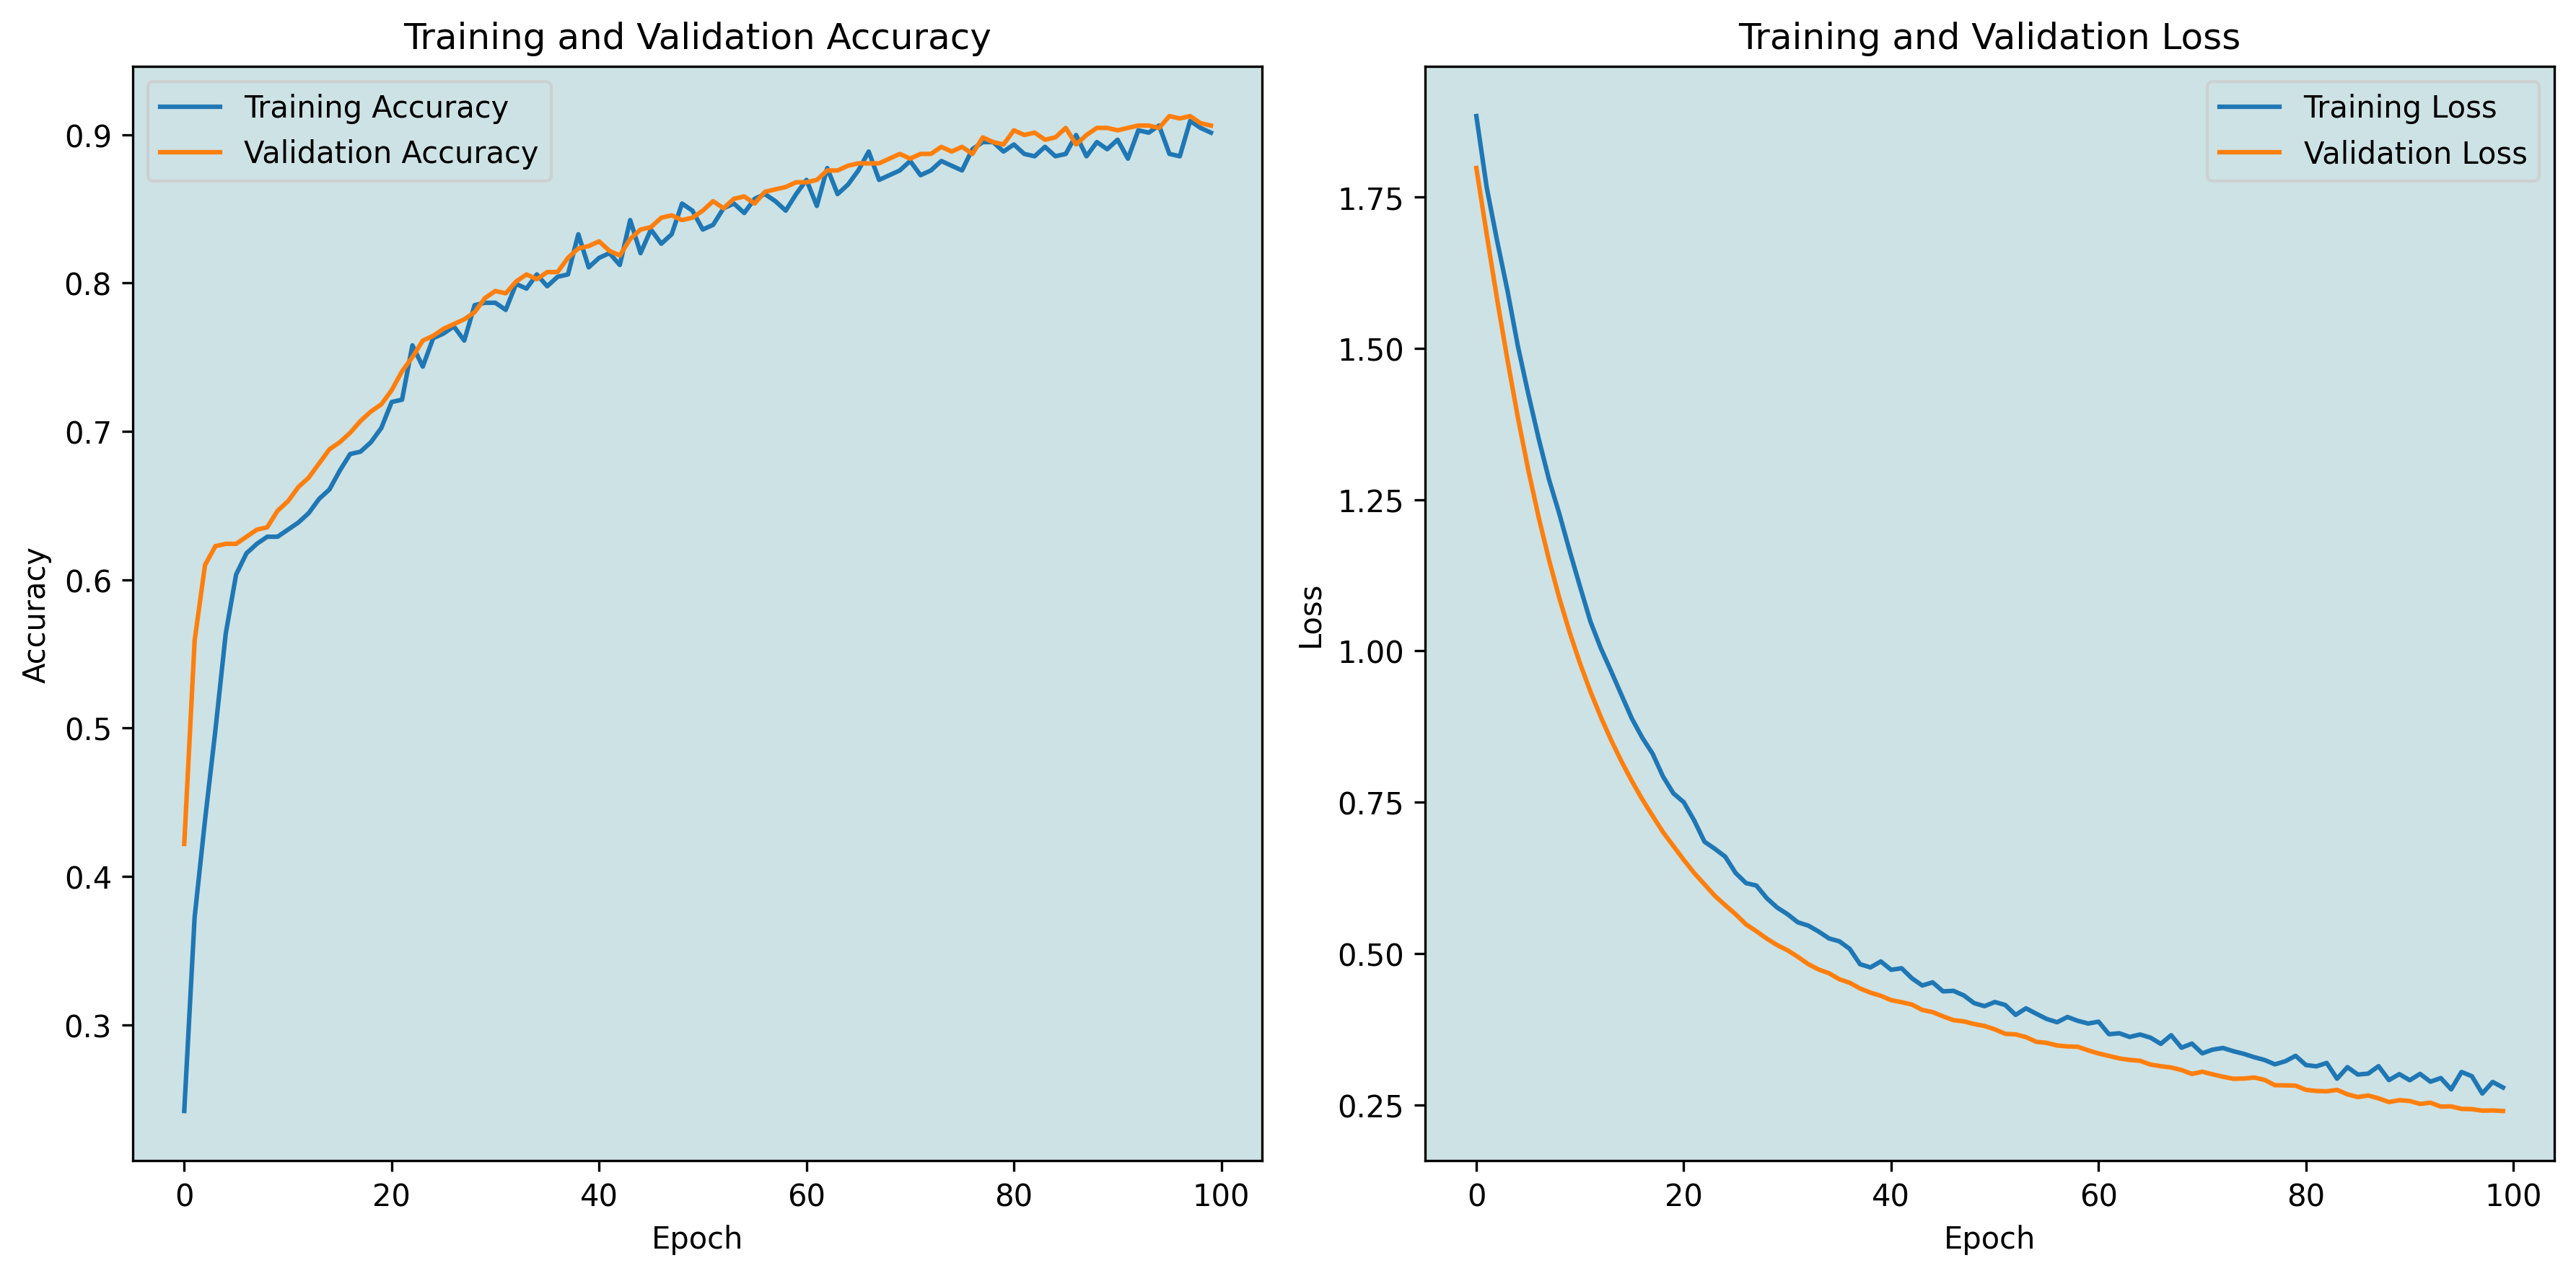

In [ ]:
# Plot accuracy and loss
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(resultSGD.history['accuracy'], label='Training Accuracy')
plt.plot(resultSGD.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(resultSGD.history['loss'], label='Training Loss')
plt.plot(resultSGD.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
nn_model_SGD.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 4096)              143360    
                                                                 
 dense_41 (Dense)            (None, 4096)              16781312  
                                                                 
 dropout_24 (Dropout)        (None, 4096)              0         
                                                                 
 dense_42 (Dense)            (None, 4096)              16781312  
                                                                 
 dropout_25 (Dropout)        (None, 4096)              0         
                                                                 
 dense_43 (Dense)            (None, 4096)              16781312  
                                                                 
 dropout_26 (Dropout)        (None, 4096)             

# Adam_Batch_128

In [ ]:
batch_size = 128
nn_model_adm = tf.keras.Sequential()
# Input Layers
input_layer = tf.keras.layers.Dense(4096, input_shape=(34,), activation ="relu")
nn_model_adm.add(input_layer)
# Hidden Layers
for i in range(3):
    nn_model_adm.add(tf.keras.layers.Dense(4096, activation = "relu"))
    nn_model_adm.add(tf.keras.layers.Dropout(0.5)) # avoid overfitting problem - forget 20% of its input data(randomly)
# Output Layers
nn_model_adm.add(tf.keras.layers.Dense(7, activation = "softmax"))

# Optimizer and Compilation
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # Adjust the learning rate as needed
nn_model_adm.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Assuming train_data, train_labels, val_data, val_labels represent your datasets
results_adm = nn_model_adm.fit(X_train, y_train, batch_size=batch_size, epochs=100, validation_data=(X_train, y_train))

Epoch 1/100
5/5 [==============================] - 2s 80ms/step - loss: 1.9625 - accuracy: 0.3965 - val_loss: 0.8211 - val_accuracy: 0.6943
Epoch 2/100
5/5 [==============================] - 0s 45ms/step - loss: 0.6674 - accuracy: 0.7341 - val_loss: 0.4497 - val_accuracy: 0.8137
Epoch 3/100
5/5 [==============================] - 0s 34ms/step - loss: 0.5480 - accuracy: 0.7771 - val_loss: 0.4900 - val_accuracy: 0.8169
Epoch 4/100
5/5 [==============================] - 0s 34ms/step - loss: 0.4678 - accuracy: 0.8232 - val_loss: 0.3058 - val_accuracy: 0.8917
Epoch 5/100
5/5 [==============================] - 0s 41ms/step - loss: 0.3678 - accuracy: 0.8551 - val_loss: 0.2466 - val_accuracy: 0.9029
Epoch 6/100
5/5 [==============================] - 0s 31ms/step - loss: 0.2718 - accuracy: 0.8901 - val_loss: 0.1915 - val_accuracy: 0.9347
Epoch 7/100
5/5 [==============================] - 0s 31ms/step - loss: 0.2555 - accuracy: 0.9108 - val_loss: 0.1505 - val_accuracy: 0.9411
Epoch 8/100
5/5 [===

In [ ]:
# Performance Evaluation
# Evaluate the model
loss, accuracy = nn_model_adm.evaluate(X_test, y_test, batch_size=batch_size)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

3/3 [==============================] - 0s 8ms/step - loss: 0.4613 - accuracy: 0.9259
Test loss: 0.4613
Test accuracy: 0.9259


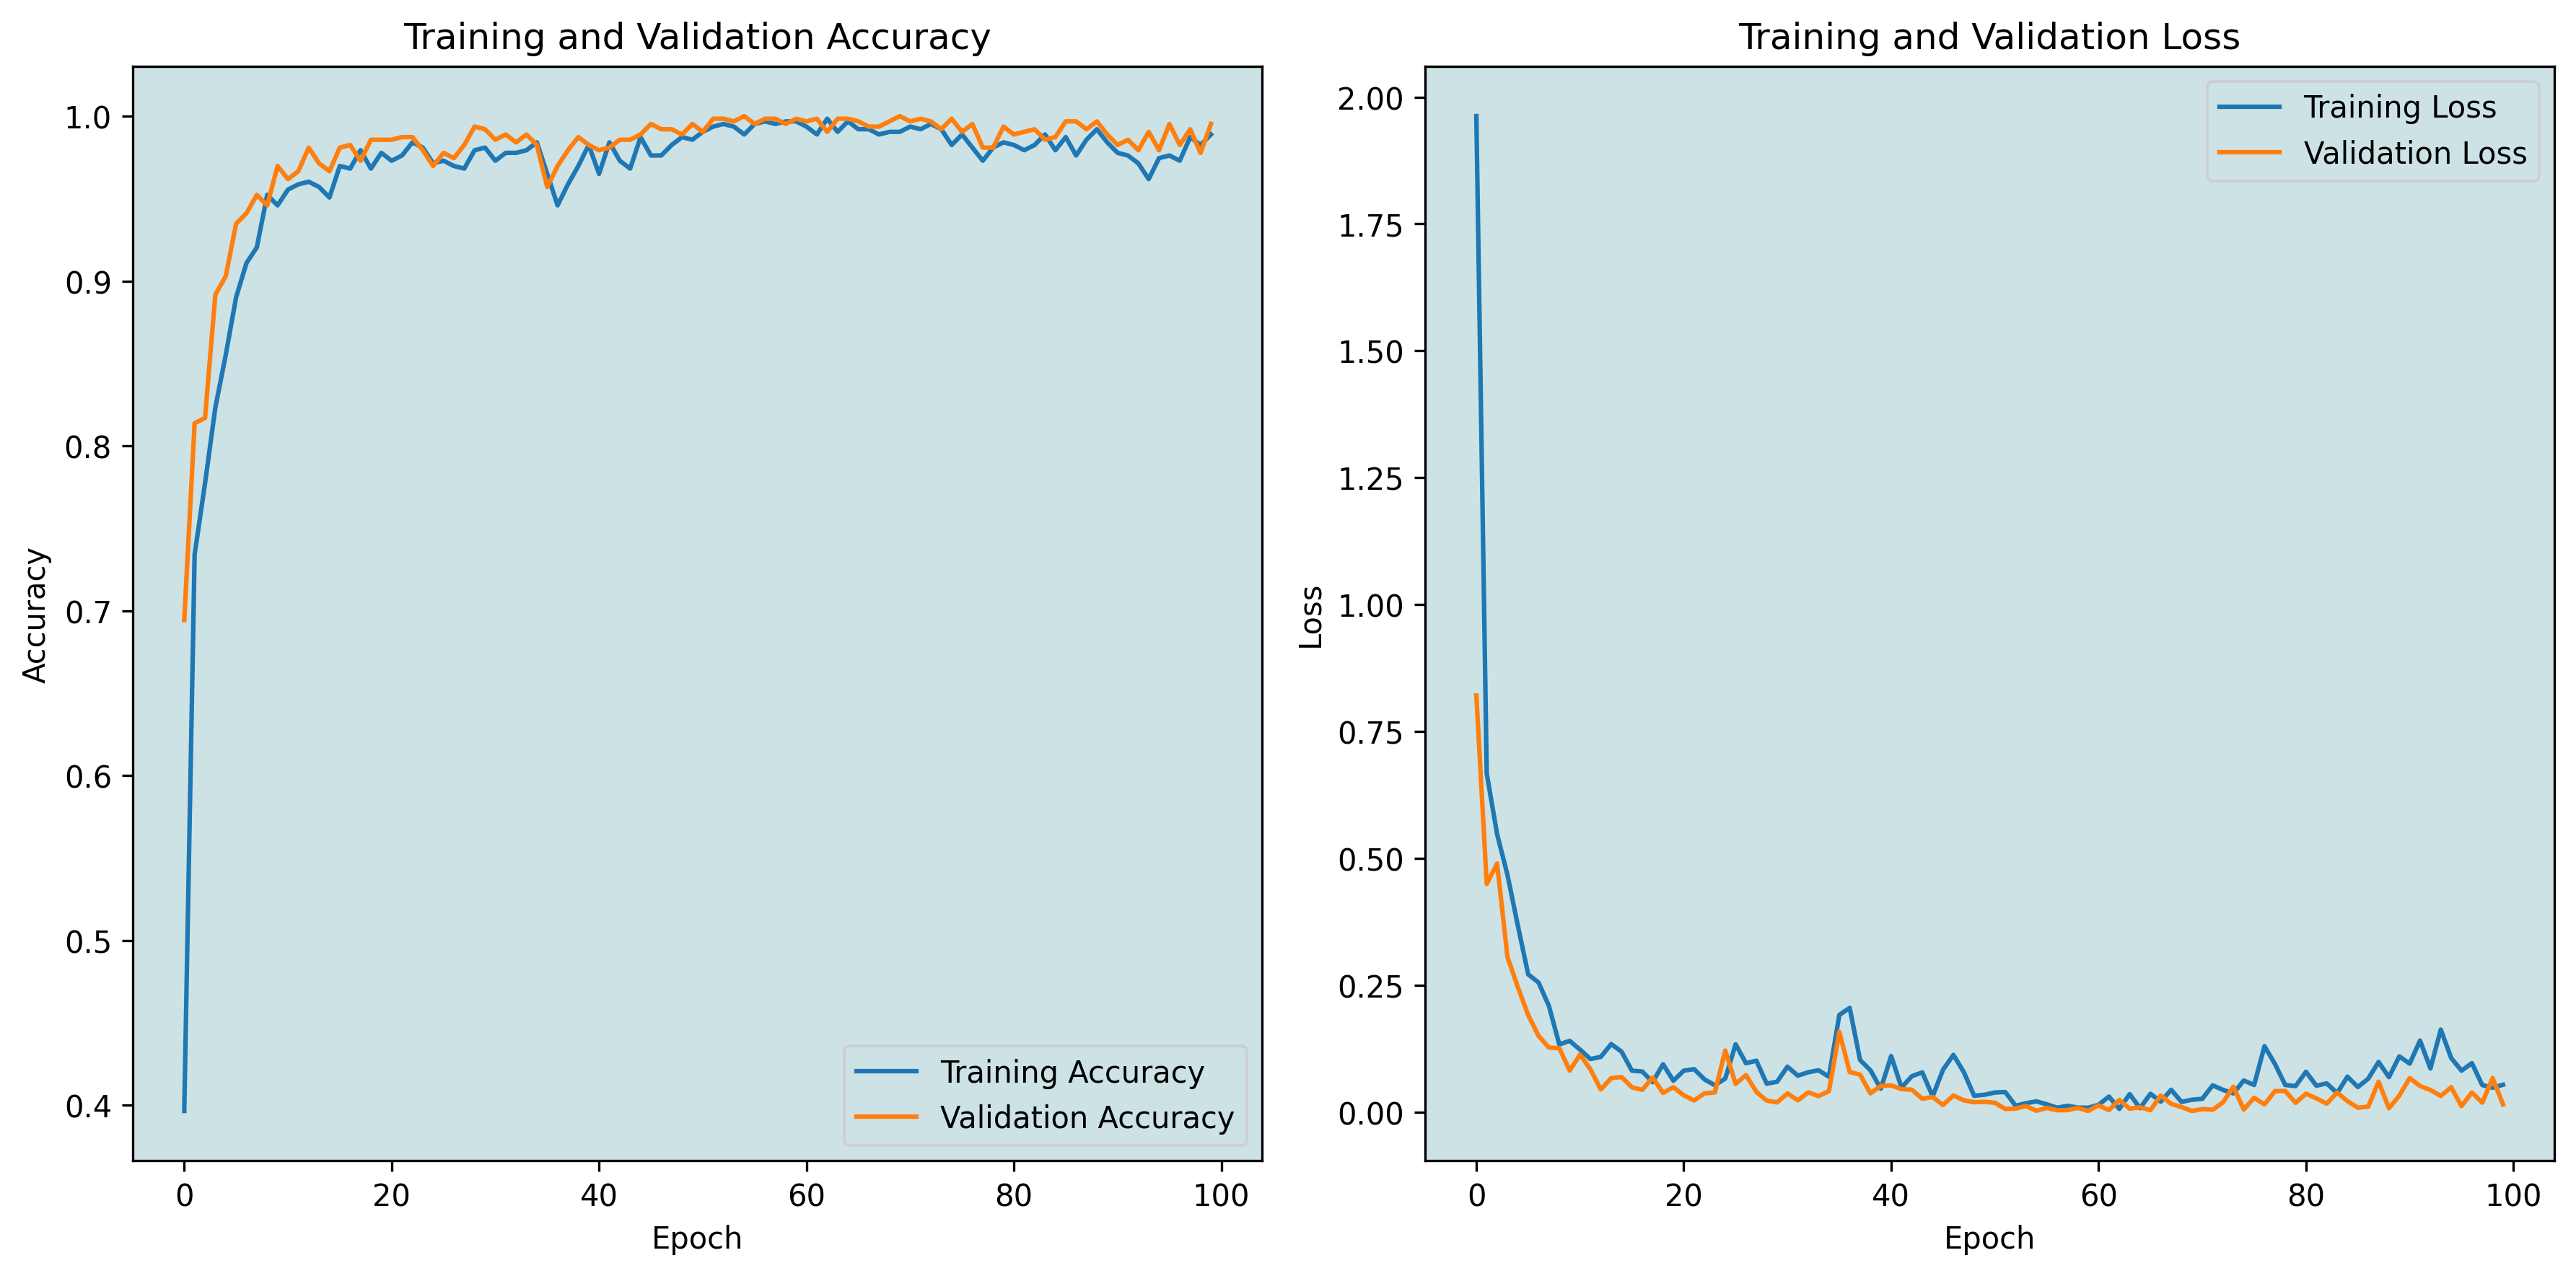

In [ ]:
# Plot accuracy and loss
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(results_adm.history['accuracy'], label='Training Accuracy')
plt.plot(results_adm.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(results_adm.history['loss'], label='Training Loss')
plt.plot(results_adm.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
nn_model_adm.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_60 (Dense)            (None, 4096)              143360    
                                                                 
 dense_61 (Dense)            (None, 4096)              16781312  
                                                                 
 dropout_36 (Dropout)        (None, 4096)              0         
                                                                 
 dense_62 (Dense)            (None, 4096)              16781312  
                                                                 
 dropout_37 (Dropout)        (None, 4096)              0         
                                                                 
 dense_63 (Dense)            (None, 4096)              16781312  
                                                                 
 dropout_38 (Dropout)        (None, 4096)            

# ADAM_Batch_64

In [ ]:
batch_size = 64
nn_model_adm = tf.keras.Sequential()
# Input Layers
input_layer = tf.keras.layers.Dense(4096, input_shape=(34,), activation ="relu")
nn_model_adm.add(input_layer)
# Hidden Layers
for i in range(3):
    nn_model_adm.add(tf.keras.layers.Dense(4096, activation = "relu"))
    nn_model_adm.add(tf.keras.layers.Dropout(0.5)) # avoid overfitting problem - forget 20% of its input data(randomly)
# Output Layers
nn_model_adm.add(tf.keras.layers.Dense(7, activation = "softmax"))

# Optimizer and Compilation
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # Adjust the learning rate as needed
nn_model_adm.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Assuming train_data, train_labels, val_data, val_labels represent your datasets
results_adm = nn_model_adm.fit(X_train, y_train, batch_size=batch_size, epochs=100, validation_data=(X_train, y_train))

Epoch 1/100
10/10 [==============================] - 2s 46ms/step - loss: 1.2311 - accuracy: 0.5780 - val_loss: 0.6102 - val_accuracy: 0.8041
Epoch 2/100
10/10 [==============================] - 0s 25ms/step - loss: 0.6772 - accuracy: 0.8025 - val_loss: 0.4703 - val_accuracy: 0.7946
Epoch 3/100
10/10 [==============================] - 0s 23ms/step - loss: 0.5047 - accuracy: 0.8121 - val_loss: 0.3924 - val_accuracy: 0.8854
Epoch 4/100
10/10 [==============================] - 0s 23ms/step - loss: 0.4295 - accuracy: 0.8631 - val_loss: 0.2271 - val_accuracy: 0.9268
Epoch 5/100
10/10 [==============================] - 0s 24ms/step - loss: 0.3224 - accuracy: 0.8981 - val_loss: 0.2103 - val_accuracy: 0.9172
Epoch 6/100
10/10 [==============================] - 0s 23ms/step - loss: 0.2282 - accuracy: 0.9092 - val_loss: 0.1912 - val_accuracy: 0.9363
Epoch 7/100
10/10 [==============================] - 0s 26ms/step - loss: 0.1955 - accuracy: 0.9331 - val_loss: 0.1022 - val_accuracy: 0.9650
Epoch 

In [ ]:
# Performance Evaluation
# Evaluate the model
loss, accuracy = nn_model_adm.evaluate(X_test, y_test, batch_size=batch_size)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

5/5 [==============================] - 0s 5ms/step - loss: 0.5825 - accuracy: 0.9333
Test loss: 0.5825
Test accuracy: 0.9333


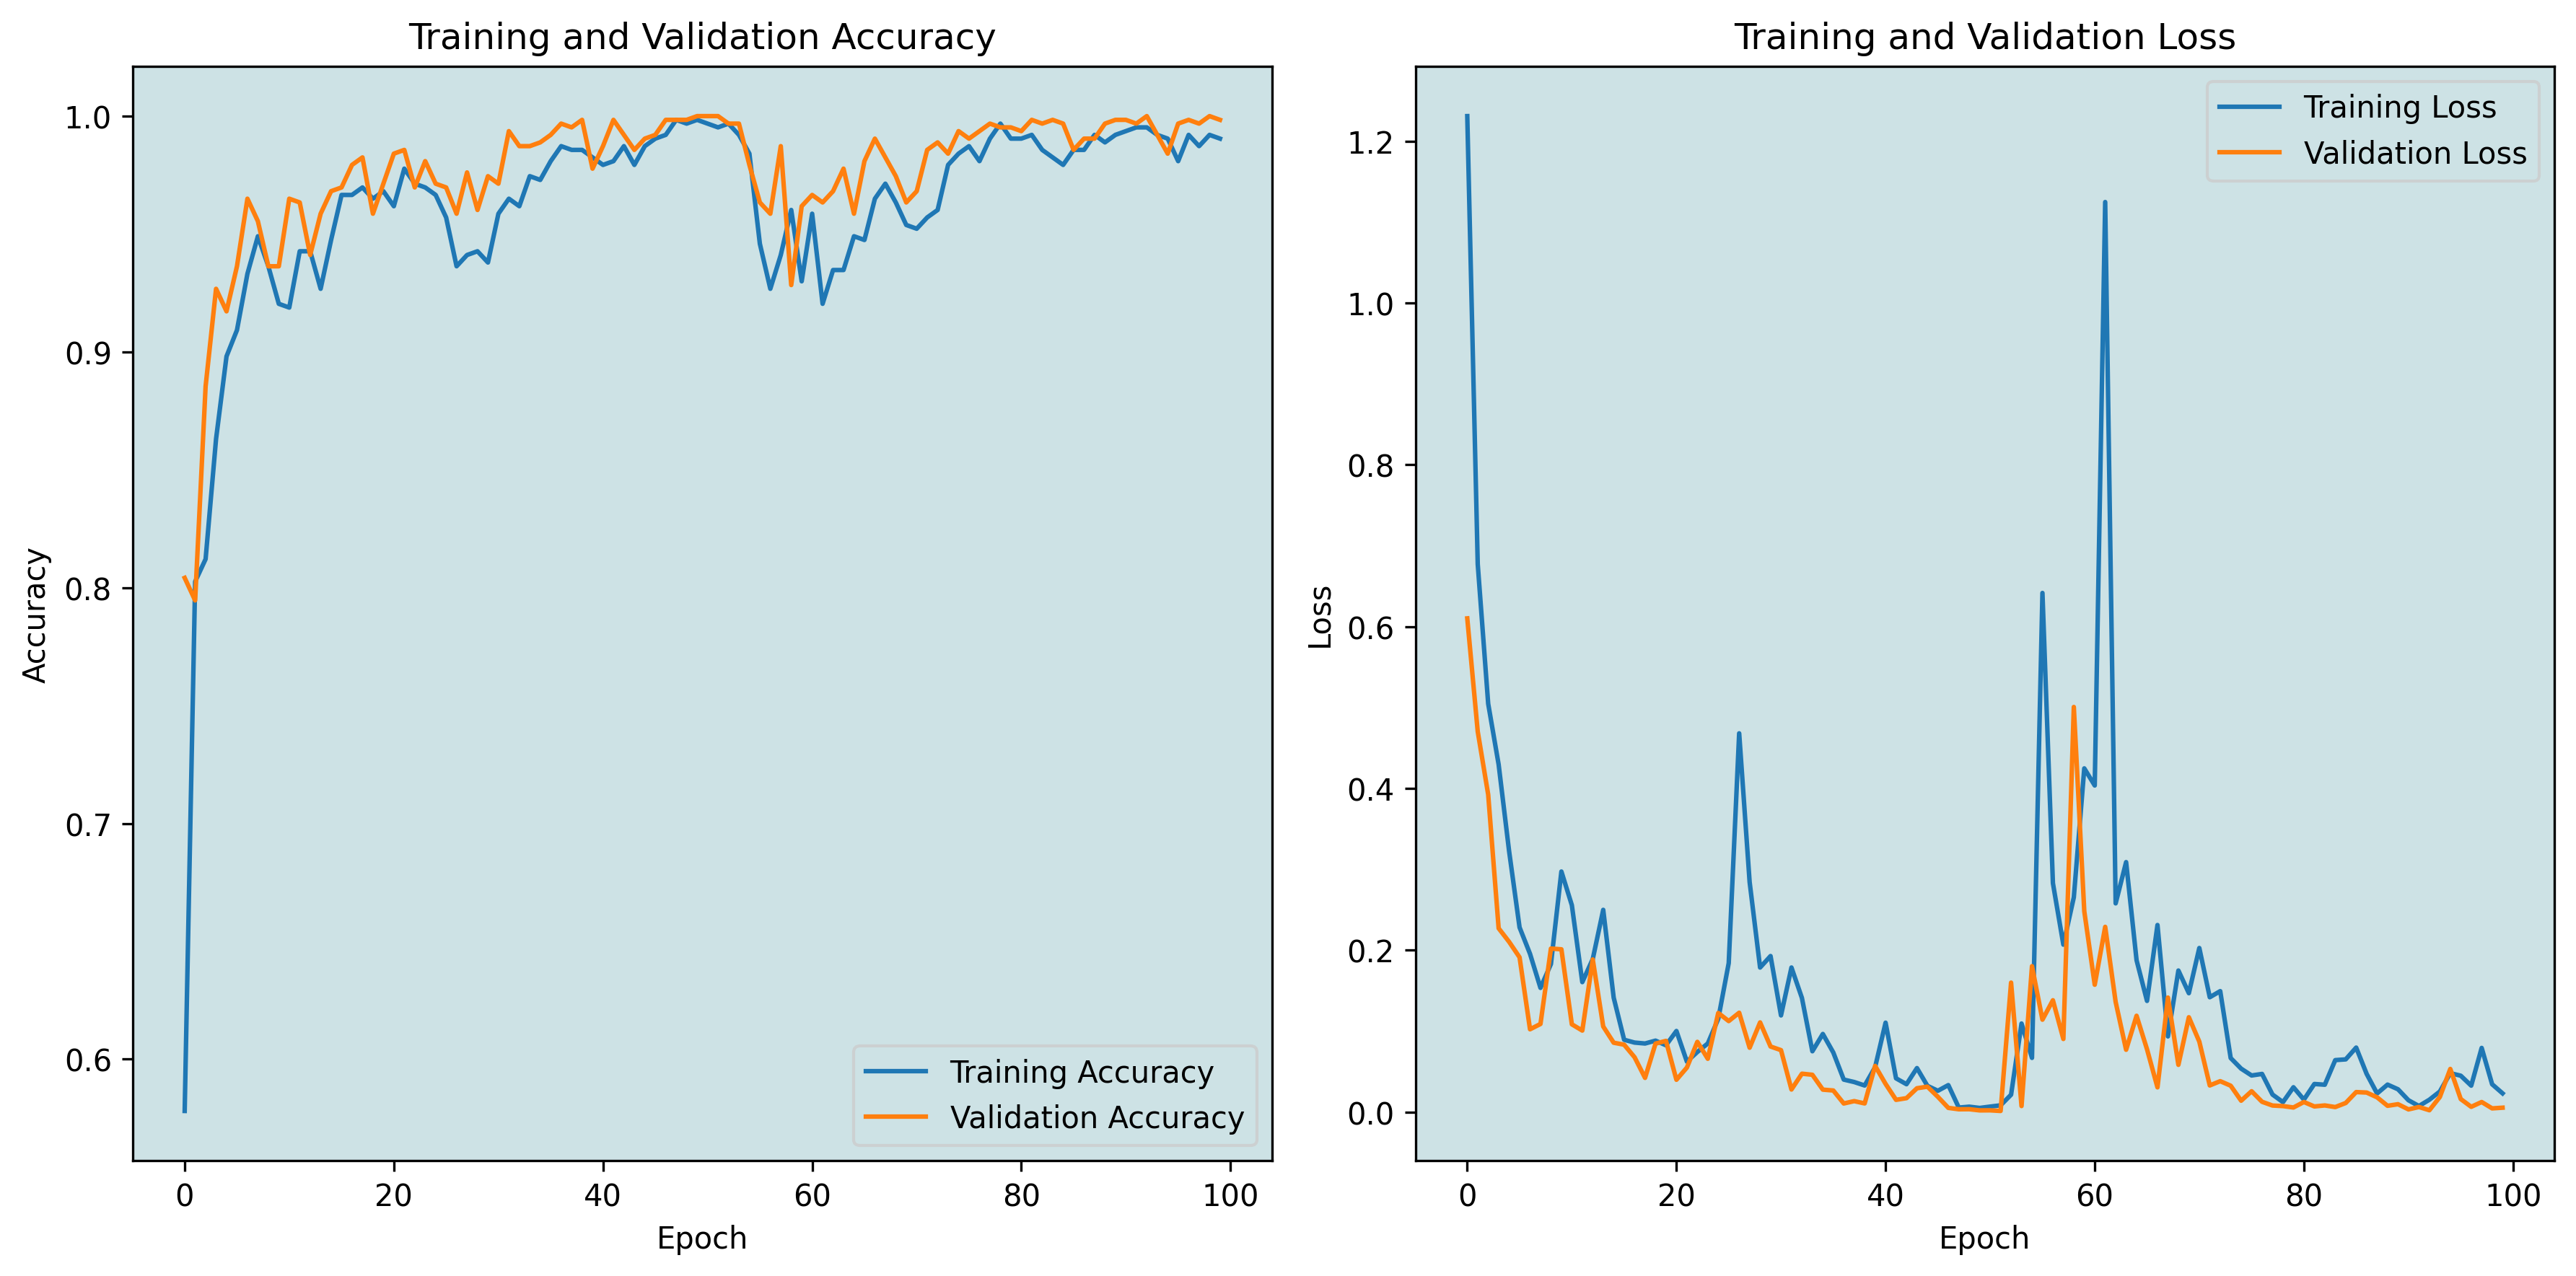

In [ ]:
# Plot accuracy and loss
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(results_adm.history['accuracy'], label='Training Accuracy')
plt.plot(results_adm.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(results_adm.history['loss'], label='Training Loss')
plt.plot(results_adm.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
nn_model_adm.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 4096)              143360    
                                                                 
 dense_51 (Dense)            (None, 4096)              16781312  
                                                                 
 dropout_30 (Dropout)        (None, 4096)              0         
                                                                 
 dense_52 (Dense)            (None, 4096)              16781312  
                                                                 
 dropout_31 (Dropout)        (None, 4096)              0         
                                                                 
 dense_53 (Dense)            (None, 4096)              16781312  
                                                                 
 dropout_32 (Dropout)        (None, 4096)            